<a href="https://colab.research.google.com/github/ThinhdanghocDE/BTL-AI/blob/main/BTL_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install hvplot


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 kB 2.9 MB/s eta 0:00:00


In [3]:
pip install ml-dtypes==0.5.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.


In [4]:
pip install tensorboard==2.19.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 32.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.


In [5]:
pip install tensorflow==2.19.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.


In [63]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn import preprocessing
import itertools
from sklearn.model_selection import validation_curve
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import hvplot.pandas
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

#**PHÂN TÍCH BỘ DỮ LIỆU GỐC**

##*Đọc dữ liệu*

In [31]:
df=pd.read_csv(r"/content/Goc.csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


##*1) Biểu đồ tần suất của biến mục tiêu deposit*

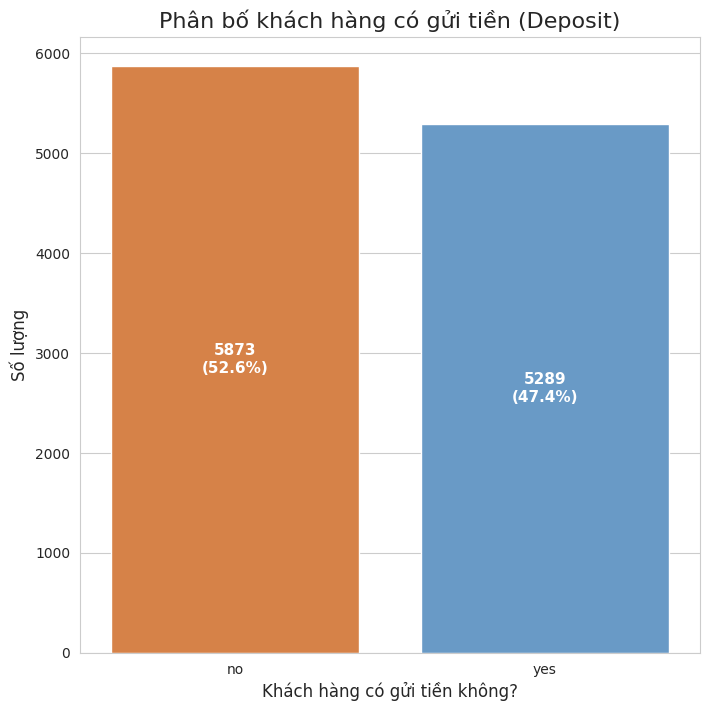

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Vẽ biểu đồ đếm cho biến 'deposit'
plt.figure(figsize=(8, 8))
ax = sns.countplot(
    x='deposit',
    data=df,
    hue='deposit',
    palette=['#5A9BD5', '#ED7D31'],
    order=['no', 'yes'],
    legend=False
)

# Thêm tiêu đề và nhãn
plt.title('Phân bố khách hàng có gửi tiền (Deposit)', fontsize=16)
plt.xlabel('Khách hàng có gửi tiền không?', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

# Hiển thị số lượng và phần trăm BÊN TRONG cột
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height * 0.5,  # Giữa cột
        f'{int(height)}\n({height/len(df)*100:.1f}%)',
        ha="center", va='center',
        fontsize=11, color='white', weight='bold'
    )

plt.show()


Biểu đồ "Tần suất của biến mục tiêu **deposit**" được sử dụng để đánh giá sự phân bố giữa các lớp dữ liệu, ở đây cụ thể là khách hàng có gửi tiền tiết kiệm hay không. Kết quả phân tích chỉ ra rằng bộ dữ liệu có sự cân bằng cao giữa hai lớp quyết định của khách hàng.

Cụ thể: Có 5.873 mẫu thuộc lớp "Không gửi tiền" (chiếm 52.6%) và 5.289 mẫu thuộc lớp "Gửi tiền" (chiếm 47.4%).

Kết luận: Sự cân bằng gần như 1:1 giữa hai lớp là một điều kiện lý tưởng để huấn luyện mô hình dự đoán. Điều này giúp giảm nguy cơ thiên lệch (bias) về phía nhóm chiếm đa số – một vấn đề thường gây khó khăn trong các bài toán phân loại. Nhờ đó, mô hình có thể học được đặc trưng của cả hai nhóm một cách khách quan hơn, từ đó nâng cao độ chính xác và tính khái quát khi áp dụng vào dữ liệu thực tế.

## *2) Biểu đồ Tỷ lệ gửi tiền theo Tình trang hôn nhân*

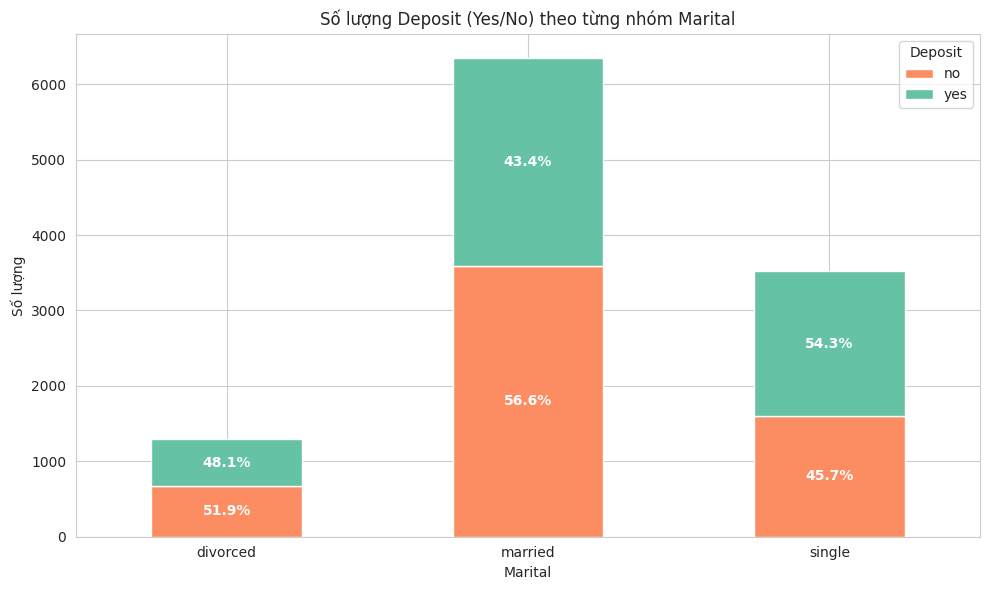

In [10]:
# Dữ liệu tổng hợp
df_clean = df.dropna(subset=['marital', 'deposit'])
deposit_summary = df_clean.groupby(['marital', 'deposit']).size().unstack(fill_value=0)

# Tính tỉ lệ phần trăm trong từng nhóm marital
deposit_percent = deposit_summary.div(deposit_summary.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ cột chồng
ax = deposit_summary.plot(
    kind='bar',
    stacked=True,
    color=['#fc8d62', '#66c2a5'],
    figsize=(10,6)
)

plt.title('Số lượng Deposit (Yes/No) theo từng nhóm Marital')
plt.xlabel('Marital')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.legend(title='Deposit')

# Thêm label phần trăm vào từng phần của cột
for i, marital_status in enumerate(deposit_summary.index):
    total = deposit_summary.loc[marital_status].sum()
    cumulative = 0
    for j, deposit_status in enumerate(deposit_summary.columns):
        count = deposit_summary.loc[marital_status, deposit_status]
        percent = deposit_percent.loc[marital_status, deposit_status]
        # Tính vị trí label trên cột (giữa phần tương ứng)
        y = cumulative + count / 2
        if count > 0:
            ax.text(
                i, y,
                f'{percent:.1f}%',
                ha='center', va='center',
                color='white', fontsize=10, fontweight='bold'
            )
        cumulative += count

plt.tight_layout()
plt.show()

Biểu đồ thể hiện số lượng khách hàng có hoặc không gửi tiền (Deposit: Yes/No) theo từng nhóm tình trạng hôn nhân (Marital: divorced, married, single). Đây là một đặc trưng phân loại (categorical feature) tiềm năng có thể đưa vào mô hình học máy để dự đoán hành vi gửi tiền.

Trong nhóm divorced (đã ly hôn), số lượng khách hàng tương đối ít so với hai nhóm còn lại. Tỷ lệ khách hàng không gửi tiền là 51.9%, trong khi tỷ lệ gửi tiền là 48.1%. Sự chênh lệch giữa hai tỷ lệ này không quá lớn, cho thấy hành vi gửi tiền ở nhóm này khá cân bằng. Vì vậy, tình trạng "divorced" có thể không phải là đặc trưng phân biệt mạnh nếu đứng một mình, và có thể cần kết hợp với các yếu tố khác như nghề nghiệp, độ tuổi hoặc mức thu nhập để tăng độ chính xác trong mô hình.

Đối với nhóm married (đã kết hôn), đây là nhóm có số lượng khách hàng đông nhất. Tuy nhiên, tỷ lệ không gửi tiền trong nhóm này lại chiếm đa số với 56.6%, cao hơn đáng kể so với 43.4% có gửi tiền. Điều này cho thấy xu hướng hành vi tiêu cực đối với việc gửi tiền ở nhóm đã kết hôn. Do quy mô nhóm lớn và mất cân bằng nhãn, nếu đưa trực tiếp vào mô hình học máy mà không xử lý cẩn thận, mô hình có thể bị thiên lệch và đánh giá thấp các mẫu thuộc nhóm married nhưng có hành vi gửi tiền.

Ngược lại, nhóm single (độc thân) lại thể hiện hành vi gửi tiền tích cực hơn. Tỷ lệ khách hàng gửi tiền đạt 54.3%, trong khi chỉ có 45.7% là không gửi. Đây là nhóm duy nhất có tỷ lệ gửi tiền cao hơn không gửi, cho thấy trạng thái độc thân có thể là một tín hiệu tốt trong việc nhận diện khách hàng tiềm năng. Đặc điểm “single” có thể là một biến phân loại mạnh trong mô hình, hỗ trợ tốt cho nhiệm vụ phân lớp.

Tổng thể, biểu đồ cung cấp thông tin quan trọng về mối quan hệ giữa tình trạng hôn nhân và hành vi gửi tiền. Tuy nhiên, để xây dựng mô hình AI hiệu quả, cần lưu ý đến việc xử lý mất cân bằng dữ liệu, kiểm tra tương quan chéo giữa các đặc trưng, và kết hợp Marital với các đặc trưng khác để tăng độ chính xác dự đoán.

## *3) Biểu đồ Tỷ lệ gửi tiền theo học vấn*

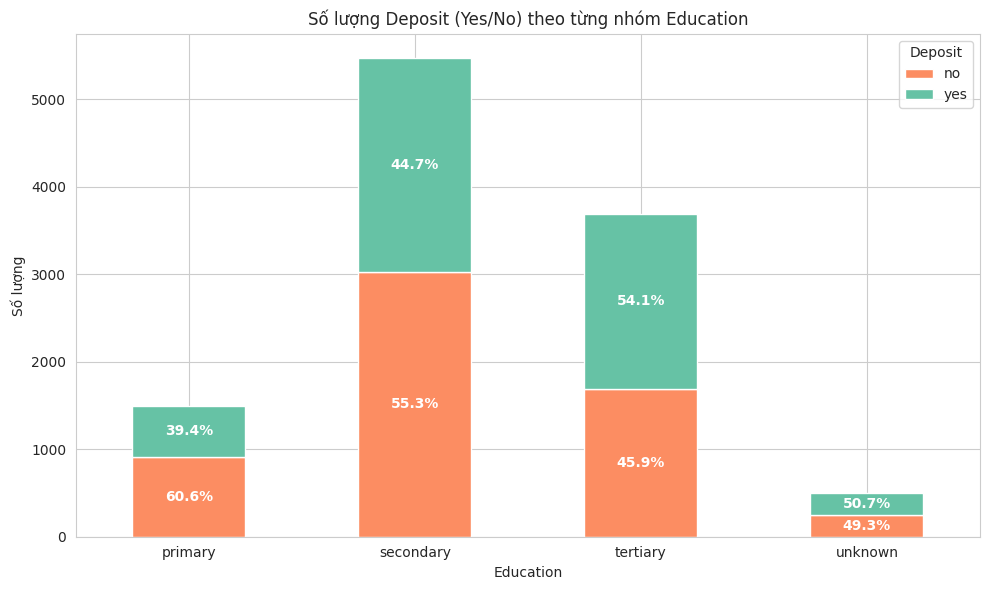

In [11]:
# Dữ liệu tổng hợp với nhóm education
df_clean = df.dropna(subset=['education', 'deposit'])
deposit_summary = df_clean.groupby(['education', 'deposit']).size().unstack(fill_value=0)

# Tính tỉ lệ phần trăm trong từng nhóm education
deposit_percent = deposit_summary.div(deposit_summary.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ cột chồng
ax = deposit_summary.plot(
    kind='bar',
    stacked=True,
    color=['#fc8d62', '#66c2a5'],
    figsize=(10,6)
)

plt.title('Số lượng Deposit (Yes/No) theo từng nhóm Education')
plt.xlabel('Education')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.legend(title='Deposit')

# Thêm label phần trăm vào từng phần của cột
for i, education_level in enumerate(deposit_summary.index):
    cumulative = 0
    for deposit_status in deposit_summary.columns:
        count = deposit_summary.loc[education_level, deposit_status]
        percent = deposit_percent.loc[education_level, deposit_status]
        y = cumulative + count / 2
        if count > 0:
            ax.text(
                i, y,
                f'{percent:.1f}%',
                ha='center', va='center',
                color='white', fontsize=10, fontweight='bold'
            )
        cumulative += count

plt.tight_layout()
plt.show()


Biểu đồ trình bày số lượng khách hàng gửi tiền (Deposit = yes) hoặc không gửi tiền (Deposit = no) được phân chia theo các nhóm trình độ học vấn: primary (tiểu học), secondary (trung học), tertiary (cao đẳng/đại học trở lên), và unknown (không rõ). Đây là một đặc trưng phân loại quan trọng, có thể ảnh hưởng đến hành vi tài chính và quyết định gửi tiền của khách hàng, do đó có tiềm năng lớn khi đưa vào mô hình học máy.

Nhóm primary (tiểu học) có tỷ lệ gửi tiền thấp nhất trong tất cả các nhóm, với chỉ 39.4% khách hàng gửi tiền, trong khi có đến 60.6% không gửi. Điều này cho thấy trình độ học vấn thấp có thể đi kèm với mức độ do dự hoặc rủi ro tài chính cao hơn, từ đó dẫn đến quyết định không gửi tiền. Đặc điểm này có thể đóng vai trò như một tín hiệu tiêu cực trong mô hình phân loại.

Nhóm secondary (trung học) là nhóm có số lượng khách hàng đông nhất. Tuy nhiên, tương tự nhóm primary, tỷ lệ không gửi tiền cũng chiếm đa số với 55.3%, trong khi tỷ lệ gửi tiền chỉ là 44.7%. Điều này cho thấy dù số lượng lớn, nhưng hành vi gửi tiền ở nhóm này chưa thật sự tích cực. Khi đưa vào mô hình AI, nhóm này có thể gây thiên lệch mô hình (model bias) nếu không xử lý mất cân bằng nhãn cẩn thận.

Trái ngược lại, nhóm tertiary (cao đẳng/đại học trở lên) lại cho thấy tín hiệu rất tích cực với 54.1% khách hàng gửi tiền và 45.9% không gửi. Đây là nhóm duy nhất (ngoại trừ unknown) mà tỷ lệ gửi tiền vượt trội hơn. Trình độ học vấn cao có thể phản ánh mức độ hiểu biết tài chính tốt hơn và xu hướng sử dụng các sản phẩm tài chính nhiều hơn. Đây là một đặc trưng có khả năng phân biệt mạnh (strong signal) trong mô hình phân loại.

Nhóm unknown (không xác định) có quy mô nhỏ nhất, với tỷ lệ khá cân bằng: 50.7% gửi tiền và 49.3% không gửi. Do dữ liệu bị thiếu (missing value), nếu giữ lại nhóm này trong tập dữ liệu huấn luyện, nên cân nhắc kỹ về cách xử lý (ví dụ: gán nhãn riêng biệt, hoặc loại bỏ nếu không đủ thông tin).

Tóm lại, biểu đồ cho thấy rõ mối quan hệ giữa trình độ học vấn và hành vi gửi tiền. Trình độ càng cao thì tỷ lệ gửi tiền càng lớn, đặc biệt nhóm tertiary là tín hiệu tích cực nhất. Điều này củng cố vai trò quan trọng của thuộc tính Education trong mô hình học máy, nhưng cũng nhấn mạnh sự cần thiết của việc xử lý cẩn thận với các nhóm có quy mô quá nhỏ hoặc mất cân bằng nhãn nghiêm trọng.

## *4) Biểu đồ Tỷ lệ gửi tiền theo nợ xấu*

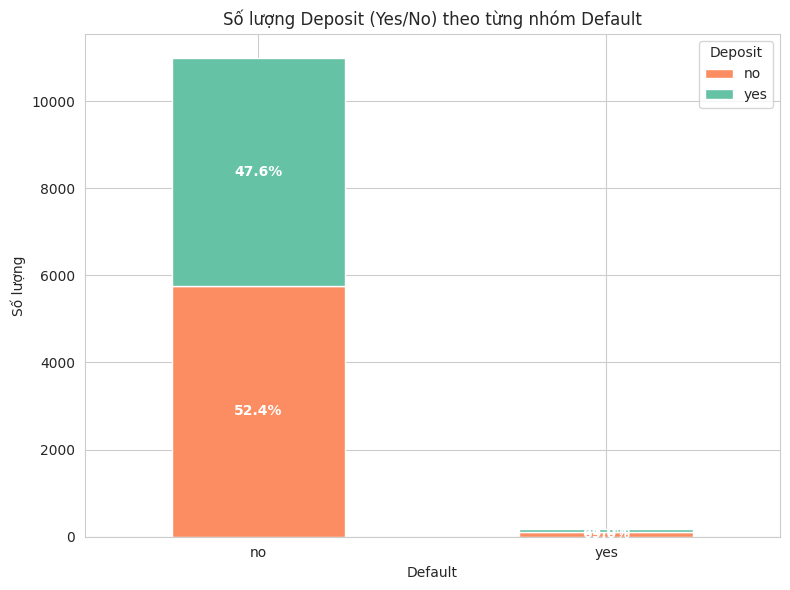

In [12]:
# Lọc bỏ giá trị NaN ở cột 'default' và 'deposit'
df_clean = df.dropna(subset=['default', 'deposit'])

# Tổng hợp số lượng deposit theo default
deposit_summary = df_clean.groupby(['default', 'deposit']).size().unstack(fill_value=0)

# Tính tỉ lệ phần trăm trong từng nhóm default
deposit_percent = deposit_summary.div(deposit_summary.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ cột chồng
ax = deposit_summary.plot(
    kind='bar',
    stacked=True,
    color=['#fc8d62', '#66c2a5'],
    figsize=(8,6)
)

plt.title('Số lượng Deposit (Yes/No) theo từng nhóm Default')
plt.xlabel('Default')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.legend(title='Deposit')

# Thêm label phần trăm vào từng phần của cột
for i, default_status in enumerate(deposit_summary.index):
    cumulative = 0
    for deposit_status in deposit_summary.columns:
        count = deposit_summary.loc[default_status, deposit_status]
        percent = deposit_percent.loc[default_status, deposit_status]
        y = cumulative + count / 2
        if count > 0:
            ax.text(
                i, y,
                f'{percent:.1f}%',
                ha='center', va='center',
                color='white', fontsize=10, fontweight='bold'
            )
        cumulative += count

plt.tight_layout()
plt.show()


Biểu đồ thể hiện số lượng khách hàng gửi tiền (Deposit = yes) hoặc không gửi tiền (Deposit = no), phân theo trạng thái nợ tín dụng mặc định (Default) gồm hai nhóm: no (không có nợ xấu) và yes (có nợ xấu). Đây là một đặc trưng tài chính quan trọng trong phân tích hành vi người dùng và xây dựng mô hình AI.

Trong nhóm Default = no, là nhóm có lịch sử tín dụng tốt, chiếm phần lớn số lượng khách hàng. Ở nhóm này, 52.4% không gửi tiền, trong khi 47.6% có gửi. Tỷ lệ khá cân bằng nhưng vẫn nghiêng về phía không gửi tiền. Điều này cho thấy dù không có nợ xấu, không phải khách hàng nào cũng sẵn sàng gửi tiền – hành vi còn bị ảnh hưởng bởi các yếu tố khác như lãi suất, niềm tin, hay mục tiêu tài chính.

Tuy nhiên, điều đặc biệt nằm ở nhóm Default = yes – tức những người có nợ xấu trước đó. Mặc dù số lượng nhóm này nhỏ hơn rất nhiều, nhưng trong đó có đến 69% khách hàng đã gửi tiền. Đây là một phát hiện rất bất ngờ và giá trị, cho thấy rằng nhóm có lịch sử tín dụng xấu lại có xu hướng tích cực hơn trong việc gửi tiền so với nhóm không có nợ. Có thể nhóm này đang nỗ lực cải thiện điểm tín dụng hoặc muốn khôi phục mối quan hệ với ngân hàng.

Từ góc nhìn AI, đặc trưng Default không chỉ là một biến nhị phân về rủi ro mà còn chứa đựng tín hiệu hành vi ngược chiều đáng chú ý. Thay vì xem nhóm "có nợ xấu" là rủi ro thuần túy, mô hình học máy có thể phát hiện đây là nhóm có động lực tài chính cao và có khả năng đáp ứng các chiến dịch gửi tiền – nếu dữ liệu đủ lớn để học.

Tóm lại, biểu đồ cho thấy sự khác biệt hành vi rõ ràng giữa hai nhóm Default. Trong đó, Default = yes có tỷ lệ gửi tiền cao vượt trội (69%) – trái ngược với trực giác và mở ra tiềm năng phân nhóm hành vi nâng cao. Đây là một yếu tố cần được giữ lại và xử lý cẩn thận khi xây dựng mô hình AI nhằm tận dụng tối đa giá trị dự báo từ dữ liệu.

## *5) Biểu đồ Tỷ lệ gửi tiền theo tình trạng vay mua nhà*

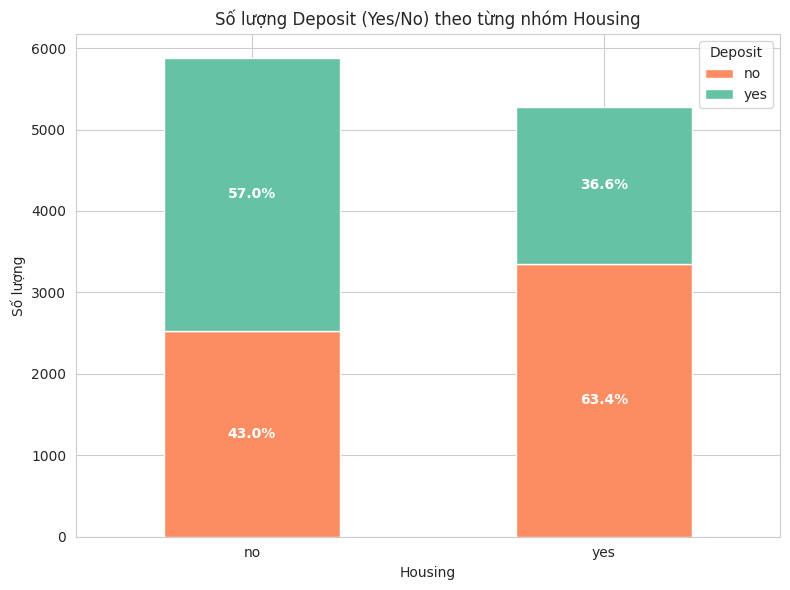

In [13]:
# Lọc bỏ giá trị NaN ở cột 'housing' và 'deposit'
df_clean = df.dropna(subset=['housing', 'deposit'])

# Tổng hợp số lượng deposit theo housing
deposit_summary = df_clean.groupby(['housing', 'deposit']).size().unstack(fill_value=0)

# Tính tỉ lệ phần trăm trong từng nhóm housing
deposit_percent = deposit_summary.div(deposit_summary.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ cột chồng
ax = deposit_summary.plot(
    kind='bar',
    stacked=True,
    color=['#fc8d62', '#66c2a5'],
    figsize=(8,6)
)

plt.title('Số lượng Deposit (Yes/No) theo từng nhóm Housing')
plt.xlabel('Housing')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.legend(title='Deposit')

# Thêm label phần trăm vào từng phần của cột
for i, housing_status in enumerate(deposit_summary.index):
    cumulative = 0
    for deposit_status in deposit_summary.columns:
        count = deposit_summary.loc[housing_status, deposit_status]
        percent = deposit_percent.loc[housing_status, deposit_status]
        y = cumulative + count / 2
        if count > 0:
            ax.text(
                i, y,
                f'{percent:.1f}%',
                ha='center', va='center',
                color='white', fontsize=10, fontweight='bold'
            )
        cumulative += count

plt.tight_layout()
plt.show()

Biểu đồ thể hiện tỷ lệ khách hàng gửi tiền (Deposit = yes) và không gửi tiền (Deposit = no) theo từng nhóm Housing – tức tình trạng vay mua nhà của khách hàng. Hai nhóm được phân tích là có vay mua nhà (yes) và không vay mua nhà (no).

Nhóm không vay mua nhà (Housing = no) có tỷ lệ gửi tiền cao hơn đáng kể. Cụ thể, 57.0% trong nhóm này đã đồng ý gửi tiền, so với chỉ 43.0% không gửi. Điều này cho thấy những khách hàng không bị ràng buộc bởi khoản vay mua nhà thường có khả năng tài chính linh hoạt hơn, hoặc có tâm lý ít lo lắng về chi tiêu định kỳ, từ đó dễ dàng tham gia vào các sản phẩm tiết kiệm.

Ngược lại, trong nhóm Housing = yes – tức những người đang có khoản vay mua nhà – chỉ có 36.6% khách hàng gửi tiền, trong khi 63.4% từ chối gửi. Điều này phản ánh xu hướng phòng thủ tài chính của nhóm khách hàng này. Họ có thể đang ưu tiên trả nợ hoặc tiết kiệm cho các chi phí khác, khiến việc gửi thêm tiền vào ngân hàng trở nên ít hấp dẫn.

Từ góc độ học máy và xây dựng mô hình AI, đặc trưng Housing tỏ ra rất có ý nghĩa phân loại. Nó giúp mô hình xác định nhóm khách hàng có khả năng tài chính dồi dào hơn và sẵn sàng tham gia sản phẩm gửi tiền. Ngoài ra, sự tương phản rõ ràng giữa hai nhóm làm cho biến này dễ học và dễ diễn giải, giúp mô hình tăng độ chính xác và khả năng giải thích.

Tóm lại, Housing là một đặc trưng mang tính quyết định: người không vay mua nhà có xu hướng gửi tiền cao hơn đáng kể. Đây là một insight quan trọng trong việc tối ưu hóa mô hình phân loại hoặc xác suất dự đoán hành vi gửi tiền của khách hàng.



## *6) Biểu đồ Tỷ lệ gửi tiền theo tình trạng nợ*

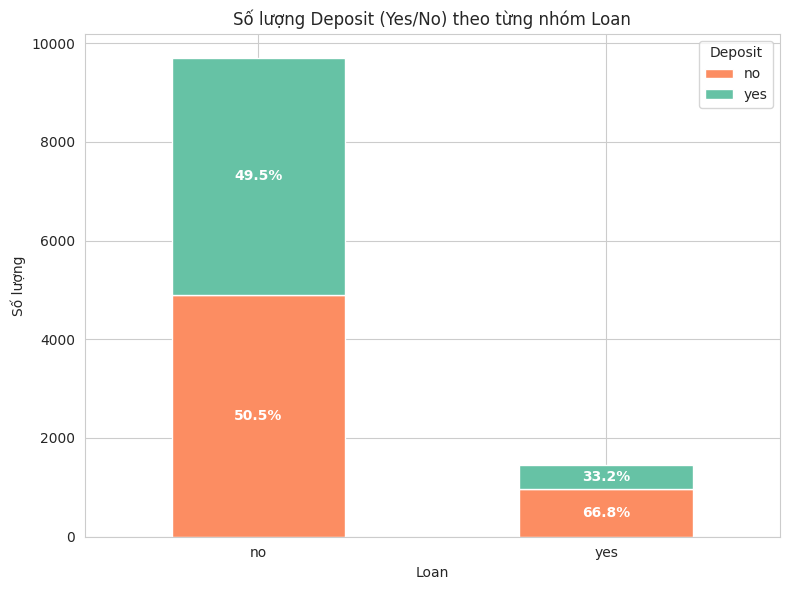

In [14]:
# Lọc bỏ NaN ở cột 'loan' và 'deposit'
df_clean = df.dropna(subset=['loan', 'deposit'])

# Tổng hợp số lượng deposit theo loan
deposit_summary = df_clean.groupby(['loan', 'deposit']).size().unstack(fill_value=0)

# Tính tỉ lệ phần trăm trong từng nhóm loan
deposit_percent = deposit_summary.div(deposit_summary.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ cột chồng
ax = deposit_summary.plot(
    kind='bar',
    stacked=True,
    color=['#fc8d62', '#66c2a5'],
    figsize=(8,6)
)

plt.title('Số lượng Deposit (Yes/No) theo từng nhóm Loan')
plt.xlabel('Loan')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.legend(title='Deposit')

# Thêm label phần trăm vào từng phần của cột
for i, loan_status in enumerate(deposit_summary.index):
    cumulative = 0
    for deposit_status in deposit_summary.columns:
        count = deposit_summary.loc[loan_status, deposit_status]
        percent = deposit_percent.loc[loan_status, deposit_status]
        y = cumulative + count / 2
        if count > 0:
            ax.text(
                i, y,
                f'{percent:.1f}%',
                ha='center', va='center',
                color='white', fontsize=10, fontweight='bold'
            )
        cumulative += count

plt.tight_layout()
plt.show()

Biểu đồ minh họa tỷ lệ gửi tiền (Deposit = yes) và không gửi tiền (Deposit = no) của khách hàng được chia theo hai nhóm: có vay tiêu dùng (Loan = yes) và không vay tiêu dùng (Loan = no).

Đối với nhóm không vay tiêu dùng, tỷ lệ gửi tiền và không gửi tiền gần như tương đương. Cụ thể, 49.5% khách hàng trong nhóm này đồng ý gửi tiền, trong khi 50.5% từ chối. Điều này cho thấy rằng khi khách hàng không bị gánh nặng bởi khoản vay tiêu dùng, khả năng họ tham gia gửi tiền là khá cao và tương đối cân bằng.

Ngược lại, ở nhóm có vay tiêu dùng, tỷ lệ gửi tiền giảm mạnh. Chỉ có 33.2% khách hàng trong nhóm này đồng ý gửi tiền, trong khi 66.8% không gửi. Điều này phản ánh xu hướng e ngại tài chính hoặc ưu tiên sử dụng tiền để trả nợ tiêu dùng, dẫn đến mức độ sẵn sàng gửi tiền vào ngân hàng thấp hơn rõ rệt.

Từ góc độ học máy, biến Loan có tính phân loại mạnh mẽ. Khả năng phân biệt giữa khách hàng có khả năng gửi tiền và không gửi tiền dựa trên tình trạng vay tiêu dùng là rất rõ ràng. Việc đưa đặc trưng này vào mô hình AI sẽ giúp cải thiện độ chính xác và khả năng dự đoán hành vi gửi tiền.

Tóm lại, khách hàng không có khoản vay tiêu dùng thể hiện xu hướng gửi tiền cao hơn đáng kể so với những người đang vay. Đây là một insight quan trọng để tối ưu hóa chiến lược tiếp thị, phân nhóm khách hàng và huấn luyện mô hình dự đoán.

## *7) Biểu đồ Tỷ lệ gửi tiền theo liên hệ*

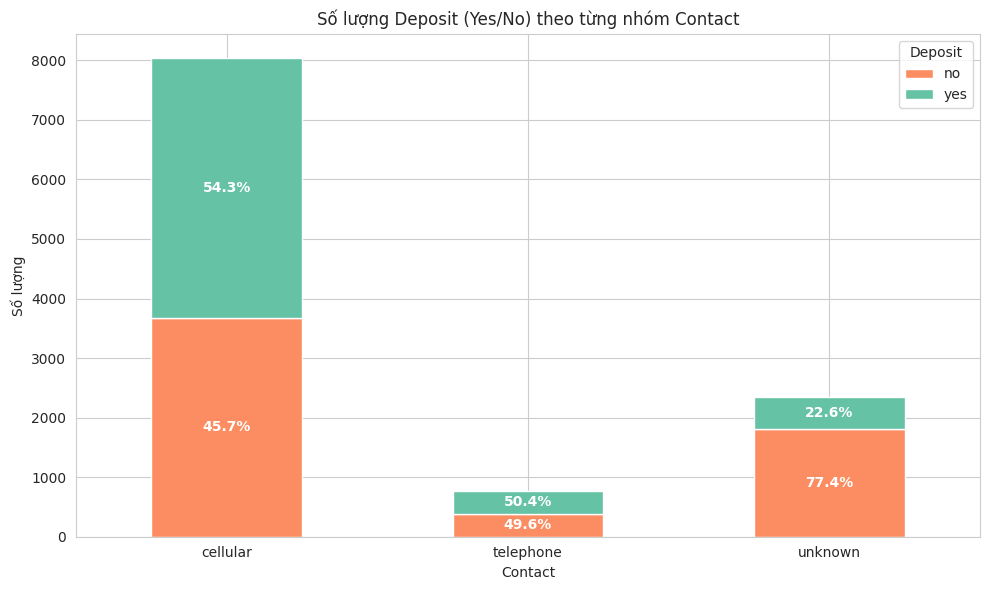

In [15]:
import matplotlib.pyplot as plt

# Lọc bỏ NaN ở cột 'contact' và 'deposit'
df_clean = df.dropna(subset=['contact', 'deposit'])

# Tổng hợp số lượng deposit theo contact
deposit_summary = df_clean.groupby(['contact', 'deposit']).size().unstack(fill_value=0)

# Tính tỉ lệ phần trăm trong từng nhóm contact
deposit_percent = deposit_summary.div(deposit_summary.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ cột chồng
ax = deposit_summary.plot(
    kind='bar',
    stacked=True,
    color=['#fc8d62', '#66c2a5'],
    figsize=(10,6)
)

plt.title('Số lượng Deposit (Yes/No) theo từng nhóm Contact')
plt.xlabel('Contact')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.legend(title='Deposit')

# Thêm label phần trăm vào từng phần của cột
for i, contact_type in enumerate(deposit_summary.index):
    cumulative = 0
    for deposit_status in deposit_summary.columns:
        count = deposit_summary.loc[contact_type, deposit_status]
        percent = deposit_percent.loc[contact_type, deposit_status]
        y = cumulative + count / 2
        if count > 0:
            ax.text(
                i, y,
                f'{percent:.1f}%',
                ha='center', va='center',
                color='white', fontsize=10, fontweight='bold'
            )
        cumulative += count

plt.tight_layout()
plt.show()


Biểu đồ thể hiện sự phân bố hành vi gửi tiền (Deposit) của khách hàng theo phương thức liên lạc cuối cùng mà họ nhận được từ ngân hàng, bao gồm ba nhóm: cellular (di động), telephone (cố định) và unknown (không xác định được hình thức liên lạc).

Đáng chú ý nhất là nhóm cellular, chiếm tỷ trọng lớn cả về số lượng lẫn tỷ lệ gửi tiền thành công. Trong nhóm này, 54.3% khách hàng đồng ý gửi tiền, cao hơn so với 45.7% từ chối. Điều này cho thấy rằng việc liên lạc qua điện thoại di động là hình thức hiệu quả nhất để thuyết phục khách hàng gửi tiền.

Ngược lại, nhóm unknown có hiệu quả kém nhất. Chỉ 22.6% trong nhóm này chấp nhận gửi tiền, trong khi 77.4% từ chối. Điều này có thể phản ánh rằng không có sự liên lạc rõ ràng hoặc phương thức liên lạc không phù hợp, khiến khả năng chuyển đổi thấp.

Nhóm telephone có tỷ lệ khá cân bằng với 50.4% đồng ý gửi tiền và 49.6% từ chối. Tuy nhiên, tổng số lượng khách hàng trong nhóm này thấp hơn đáng kể so với nhóm cellular, cho thấy rằng việc sử dụng điện thoại cố định không còn phổ biến hoặc không phải là kênh tiếp cận chính.

Từ góc độ mô hình hóa AI, đặc trưng Contact là một yếu tố phân loại rất hữu ích. Nhóm "cellular" cho thấy hiệu quả tiếp cận tốt nhất, còn nhóm "unknown" mang tính rủi ro cao với tỷ lệ từ chối gửi tiền lớn. Việc ưu tiên tiếp cận khách hàng qua điện thoại di động có thể giúp nâng cao tỷ lệ chuyển đổi và hiệu quả chiến dịch marketing.

## *8) Biểu đồ Tỷ lệ gửi tiền theo Campaign*

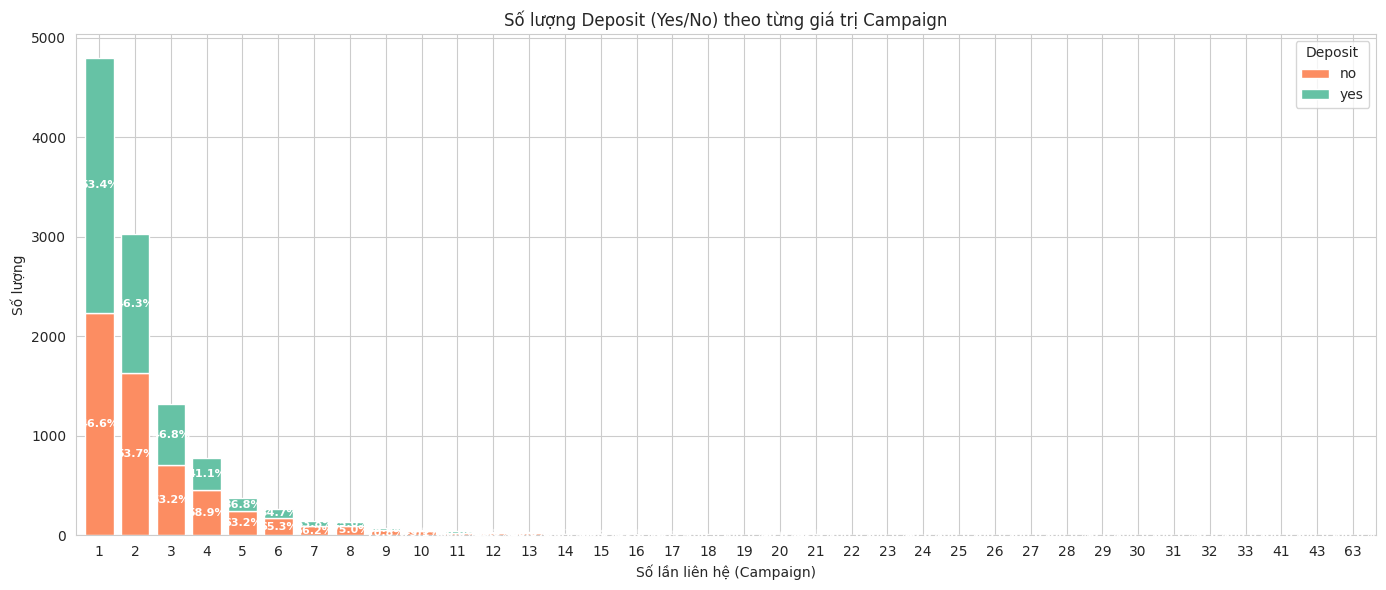

In [16]:
# Tổng hợp số lượng deposit theo từng giá trị campaign
deposit_summary = df_clean.groupby(['campaign', 'deposit']).size().unstack(fill_value=0)

# Tính phần trăm trong từng giá trị campaign
deposit_percent = deposit_summary.div(deposit_summary.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ cột chồng
ax = deposit_summary.plot(
    kind='bar',
    stacked=True,
    color=['#fc8d62', '#66c2a5'],
    figsize=(14, 6),
    width=0.8
)

plt.title('Số lượng Deposit (Yes/No) theo từng giá trị Campaign')
plt.xlabel('Số lần liên hệ (Campaign)')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.legend(title='Deposit')

# Thêm phần trăm vào từng phần cột
for i, campaign_value in enumerate(deposit_summary.index):
    cumulative = 0
    for deposit_status in deposit_summary.columns:
        count = deposit_summary.loc[campaign_value, deposit_status]
        percent = deposit_percent.loc[campaign_value, deposit_status]
        y = cumulative + count / 2
        if count > 0:
            ax.text(
                i, y,
                f'{percent:.1f}%',
                ha='center', va='center',
                color='white', fontsize=8, fontweight='bold'
            )
        cumulative += count

plt.tight_layout()
plt.show()

Biểu đồ trên minh họa mối quan hệ giữa số lần liên hệ với khách hàng trong chiến dịch marketing (biến “Campaign”) và hành vi gửi tiền (Deposit) tại ngân hàng. Các cột biểu diễn số lượng khách hàng tương ứng với từng số lần liên hệ, được chia thành hai nhóm: đồng ý gửi tiền (Deposit = yes) và không gửi tiền (Deposit = no).

Kết quả cho thấy, số lần liên hệ đầu tiên đến lần thứ ba mang lại hiệu quả cao nhất trong việc thuyết phục khách hàng gửi tiền. Cụ thể, tỷ lệ gửi tiền tại lần liên hệ thứ hai và thứ ba đạt lần lượt 6.3% và 6.8%, cao hơn đáng kể so với các mốc sau đó. Mặc dù lần liên hệ đầu tiên có tỷ lệ thấp hơn (3.4%), nhưng đây vẫn là mốc đáng chú ý vì tập khách hàng được tiếp cận ở lần này chiếm số lượng lớn nhất.

Từ lần liên hệ thứ tư trở đi, tỷ lệ gửi tiền bắt đầu giảm và không còn giữ được mức hiệu quả như ban đầu. Đặc biệt, từ lần thứ năm trở lên, tỷ lệ gửi tiền giảm mạnh, có lúc chỉ còn 1.1% hoặc thấp hơn. Đồng thời, số lượng khách hàng được tiếp cận ở các mốc cao cũng giảm rõ rệt. Điều này cho thấy rằng việc tiếp cận khách hàng quá nhiều lần không mang lại hiệu quả đáng kể, thậm chí có thể phản tác dụng do khiến khách hàng khó chịu hoặc giảm sự quan tâm.

Tóm lại, chiến dịch marketing nên giới hạn số lần liên hệ tối ưu trong khoảng 1 đến 3 lần. Việc tiếp cận khách hàng quá nhiều lần không giúp cải thiện tỷ lệ gửi tiền mà còn làm lãng phí nguồn lực. Đây là một insight quan trọng giúp ngân hàng tối ưu hóa chiến lược tiếp cận khách hàng và nâng cao hiệu quả trong việc xây dựng mô hình AI dự đoán hành vi.

## *9) Biểu đồ Tỷ lệ gửi tiền theo Tháng*

<ipython-input-17-15232c3f962b>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deposit_summary = df_clean.groupby(['month', 'deposit']).size().unstack(fill_value=0)


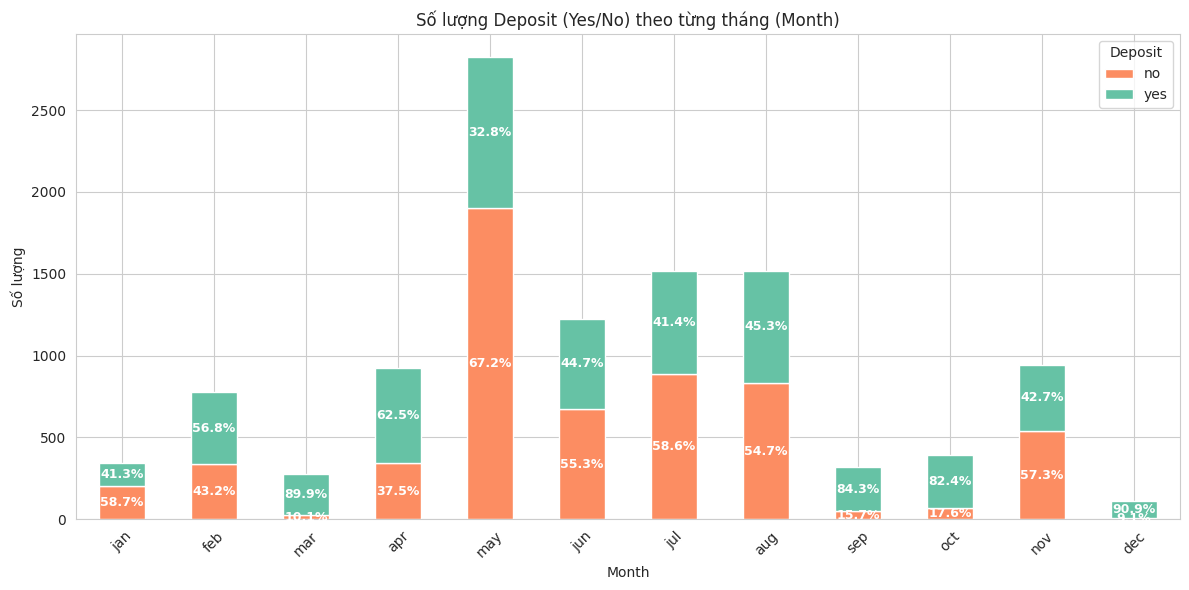

In [17]:
# Danh sách thứ tự tháng đúng
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Chuyển cột 'month' thành kiểu phân loại có thứ tự
df_clean['month'] = pd.Categorical(df_clean['month'], categories=month_order, ordered=True)

# Sau đó groupby sẽ giữ đúng thứ tự
deposit_summary = df_clean.groupby(['month', 'deposit']).size().unstack(fill_value=0)
deposit_percent = deposit_summary.div(deposit_summary.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ
ax = deposit_summary.plot(
    kind='bar',
    stacked=True,
    color=['#fc8d62', '#66c2a5'],
    figsize=(12,6)
)

plt.title('Số lượng Deposit (Yes/No) theo từng tháng (Month)')
plt.xlabel('Month')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.legend(title='Deposit')

# Thêm phần trăm trên cột
for i, month in enumerate(deposit_summary.index):
    cumulative = 0
    for deposit_status in deposit_summary.columns:
        count = deposit_summary.loc[month, deposit_status]
        percent = deposit_percent.loc[month, deposit_status]
        y = cumulative + count / 2
        if count > 0:
            ax.text(
                i, y,
                f'{percent:.1f}%',
                ha='center', va='center',
                color='white', fontsize=9, fontweight='bold'
            )
        cumulative += count

plt.tight_layout()
plt.show()


Biểu đồ trên thể hiện số lượng khách hàng đồng ý gửi tiền (Deposit = yes) và không gửi tiền (Deposit = no) được phân bố theo các tháng trong năm. Mỗi cột biểu diễn tổng số khách hàng được tiếp cận trong một tháng, đồng thời hiển thị tỷ lệ phần trăm của từng nhóm.

Tháng có tỷ lệ gửi tiền cao nhất là tháng 12 (dec) với 90.9% khách hàng đồng ý gửi tiền, tiếp theo là tháng 3 (mar) với 89.9%, và tháng 9 (sep) với 84.3%. Các tháng như tháng 10 (oct) và tháng 4 (apr) cũng ghi nhận tỷ lệ gửi tiền khá cao, lần lượt là 82.4% và 62.5%. Đây có thể là những thời điểm khách hàng có xu hướng ổn định tài chính hoặc có các kế hoạch tiết kiệm cụ thể (gần cuối năm, sau Tết...).

Ngược lại, tháng 5 (may) là tháng có tỷ lệ khách hàng không gửi tiền cao nhất, chiếm 67.2%, trong khi tỷ lệ gửi tiền chỉ đạt 32.8%. Đây cũng là tháng có tổng số lượng khách hàng tiếp cận cao nhất, cho thấy mặc dù tiếp cận nhiều nhưng hiệu quả không cao. Ngoài ra, các tháng như tháng 7 (jul), tháng 6 (jun) và tháng 11 (nov) cũng có tỷ lệ từ chối gửi tiền cao hơn nhóm đồng ý.

Một điểm đáng chú ý là các tháng có tỷ lệ gửi tiền cao lại thường đi kèm với số lượng tiếp cận thấp. Ví dụ như tháng 3 và tháng 12 có tổng số khách hàng khá nhỏ nhưng lại có tỷ lệ gửi tiền vượt trội. Điều này có thể phản ánh chiến lược tiếp cận có chọn lọc, hoặc khách hàng trong các tháng này có mức độ sẵn sàng tài chính tốt hơn.

Từ góc độ học máy, biến thời gian theo tháng là một đặc trưng tiềm năng giúp phân biệt hành vi khách hàng. Việc mô hình hóa yếu tố “Month” dưới dạng biến phân loại có thể giúp dự đoán thời điểm phù hợp để tiếp cận từng nhóm khách hàng cụ thể.

Tóm lại, phân tích theo tháng cho thấy hành vi gửi tiền của khách hàng có sự thay đổi rõ rệt theo mùa vụ. Các tháng như 3, 9, 10, 12 nên được ưu tiên cho các chiến dịch gửi tiền, trong khi cần xem xét lại hiệu quả hoạt động marketing vào các tháng như 5, 7 và 11. Thông tin này rất hữu ích để tối ưu hóa kế hoạch triển khai chiến dịch ngân hàng và nâng cao hiệu suất mô hình dự đoán hành vi khách hàng.

## *10) Biểu đồ Tỷ lệ gửi tiền theo poutcome*

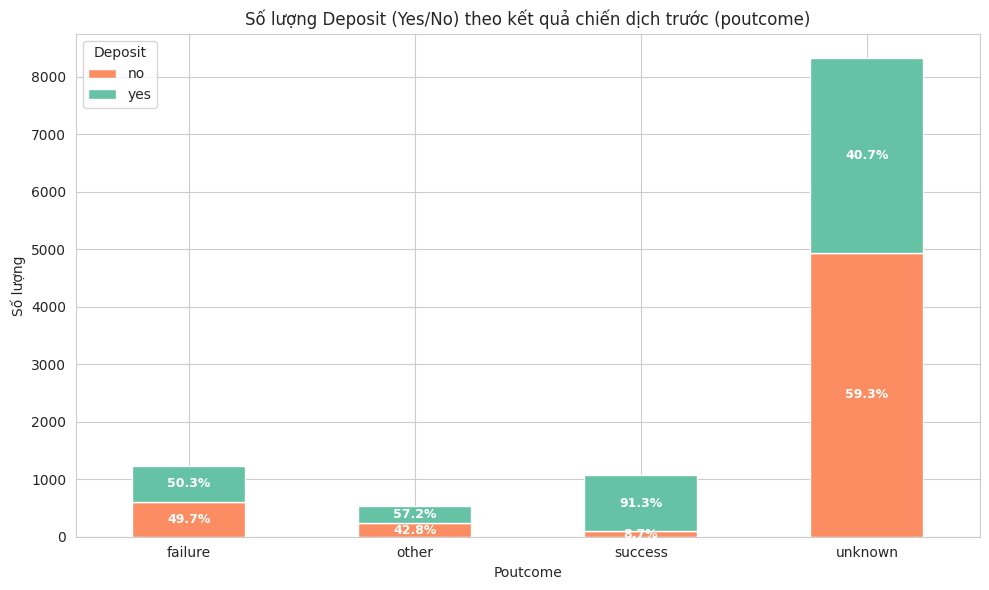

In [18]:

# Lọc bỏ giá trị NaN trong cột 'poutcome' và 'deposit'
df_clean = df.dropna(subset=['poutcome', 'deposit'])

# Tổng hợp số lượng deposit theo từng giá trị poutcome
deposit_summary = df_clean.groupby(['poutcome', 'deposit']).size().unstack(fill_value=0)

# Tính phần trăm trong từng nhóm poutcome
deposit_percent = deposit_summary.div(deposit_summary.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ cột chồng
ax = deposit_summary.plot(
    kind='bar',
    stacked=True,
    color=['#fc8d62', '#66c2a5'],
    figsize=(10, 6)
)

plt.title('Số lượng Deposit (Yes/No) theo kết quả chiến dịch trước (poutcome)')
plt.xlabel('Poutcome')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.legend(title='Deposit')

# Thêm nhãn phần trăm trên từng phần của cột
for i, poutcome_value in enumerate(deposit_summary.index):
    cumulative = 0
    for deposit_status in deposit_summary.columns:
        count = deposit_summary.loc[poutcome_value, deposit_status]
        percent = deposit_percent.loc[poutcome_value, deposit_status]
        y = cumulative + count / 2
        if count > 0:
            ax.text(
                i, y,
                f'{percent:.1f}%',
                ha='center', va='center',
                color='white', fontsize=9, fontweight='bold'
            )
        cumulative += count

plt.tight_layout()
plt.show()

Biểu đồ thể hiện mối liên hệ giữa kết quả chiến dịch marketing trước đó (biến poutcome) và hành vi gửi tiền (Deposit) trong chiến dịch hiện tại. Các giá trị của poutcome bao gồm: success, failure, other, và unknown.

Đáng chú ý nhất là nhóm khách hàng có kết quả chiến dịch trước là success. Trong nhóm này, tỷ lệ khách hàng đồng ý gửi tiền lên tới 91.3%, trong khi chỉ 8.7% từ chối. Đây là mức chênh lệch lớn nhất trong toàn bộ các nhóm, cho thấy rằng sự thành công của các chiến dịch marketing trước đó có ảnh hưởng cực kỳ tích cực đến quyết định gửi tiền trong hiện tại. Điều này đồng thời phản ánh mức độ tin tưởng và mối quan hệ lâu dài giữa khách hàng và ngân hàng sau chiến dịch thành công.

Trong nhóm failure, tỷ lệ gửi tiền và không gửi gần như ngang bằng – lần lượt là 50.3% và 49.7%. Điều này cho thấy mặc dù chiến dịch trước không thành công, nhưng khách hàng vẫn còn có khả năng gửi tiền ở chiến dịch mới nếu được tiếp cận đúng cách.

Nhóm other cũng cho kết quả khả quan với 57.2% khách hàng đồng ý gửi tiền, cao hơn so với tỷ lệ từ chối là 42.8%. Có thể đây là nhóm khách hàng có phản hồi không rõ ràng hoặc không thuộc nhóm thành công/thất bại cụ thể, nhưng vẫn có tiềm năng được khai thác.

Đối với nhóm unknown, tức là không rõ kết quả chiến dịch trước, tỷ lệ gửi tiền giảm xuống còn 40.7%, trong khi tỷ lệ từ chối là 59.3%. Mặc dù số lượng khách hàng trong nhóm này rất lớn, việc thiếu thông tin khiến việc thuyết phục họ gửi tiền gặp nhiều khó khăn hơn. Đây là nhóm cần được phân tích kỹ và có thể phải ưu tiên thu thập dữ liệu tốt hơn ở các chiến dịch sau.

Từ góc nhìn học máy, biến poutcome là một đặc trưng rất quan trọng, đặc biệt là giá trị success, có khả năng phân biệt mạnh mẽ giữa các nhóm hành vi. Đưa biến này vào mô hình dự đoán sẽ giúp tăng độ chính xác đáng kể trong việc xác định khách hàng tiềm năng.

## *11) Biểu đồ Tỷ lệ gửi tiền theo Nghề nghiệp*

<Figure size 1200x800 with 0 Axes>

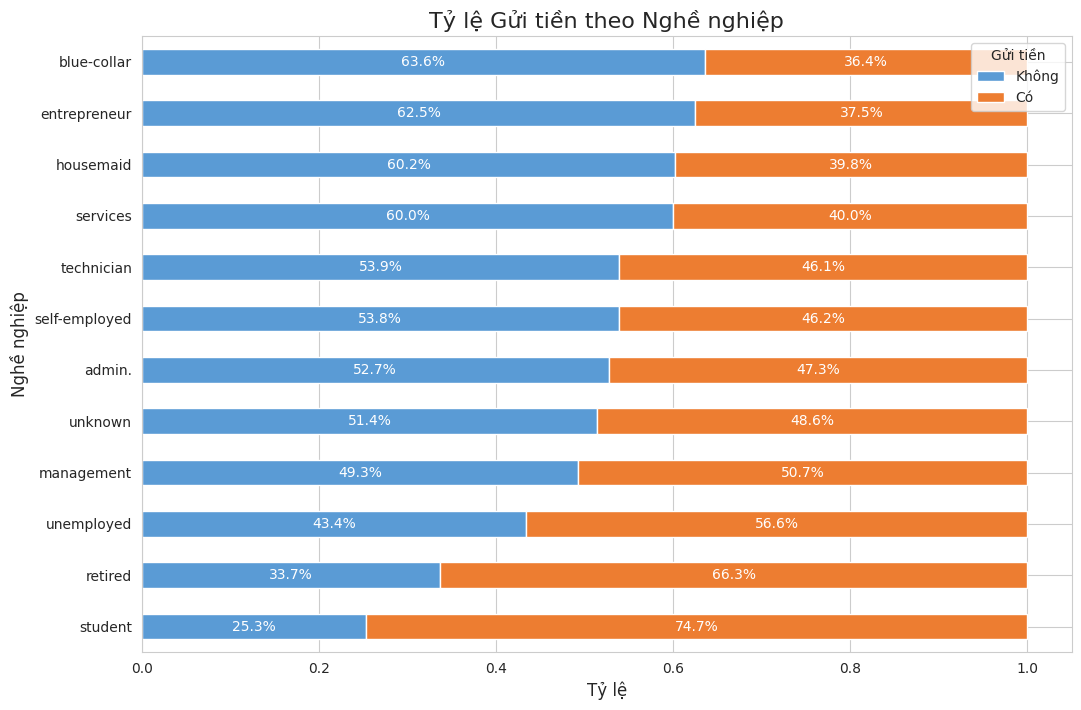

In [19]:
plt.figure(figsize=(12, 8))

# Tạo bảng chéo
job_crosstab = pd.crosstab(df['job'], df['deposit'])
job_crosstab_pct = job_crosstab.div(job_crosstab.sum(axis=1), axis=0)

# Sắp xếp theo tỷ lệ 'yes' giảm dần
job_crosstab_pct_sorted = job_crosstab_pct.sort_values(by='yes', ascending=False)

# Vẽ biểu đồ stacked bar
ax = job_crosstab_pct_sorted.plot(kind='barh', stacked=True, figsize=(12, 8), color=['#5A9BD5', '#ED7D31'])

plt.title('Tỷ lệ Gửi tiền theo Nghề nghiệp', fontsize=16)
plt.xlabel('Tỷ lệ', fontsize=12)
plt.ylabel('Nghề nghiệp', fontsize=12)
plt.legend(title='Gửi tiền', labels=['Không', 'Có'])

# Thêm giá trị phần trăm lên từng thanh
for i, (index, row) in enumerate(job_crosstab_pct_sorted.iterrows()):
    left = 0  # vị trí bắt đầu của phần bar màu đầu tiên
    for j, col in enumerate(job_crosstab_pct_sorted.columns):
        width = row[col]
        if width > 0.01:  # chỉ hiện giá trị nếu phần trăm > 1%
            ax.text(left + width / 2, i, f'{width:.1%}', ha='center', va='center', color='white', fontsize=10)
        left += width

plt.show()


Phân tích biểu đồ cho thấy có một mối liên hệ rõ nét giữa nghề nghiệp của khách hàng và khả năng họ đăng ký sản phẩm tiền gửi. Cụ thể, nhóm "Sinh viên", "Đã nghỉ hưu" và "Thất nghiệp" có tỷ lệ gửi tiền cao nhất trong tất cả các nghề nghiệp được khảo sát. Ngược lại, những khách hàng làm "Công nhân" và trong ngành "Dịch vụ" lại có tỷ lệ đăng ký thấp hơn hẳn so với mức trung bình.

Điều này cho thấy nghề nghiệp là một yếu tố quan trọng giúp phân khúc khách hàng hiệu quả. Dựa trên kết quả này, các chiến dịch marketing nên tập trung nhiều hơn vào những nhóm có tỷ lệ chuyển đổi cao để tận dụng tối đa nguồn lực và nâng cao hiệu quả kinh doanh.



## *12) Phân tích ảnh hưởng của Tuổi (age) và Thời gian cuộc gọi (duration)*

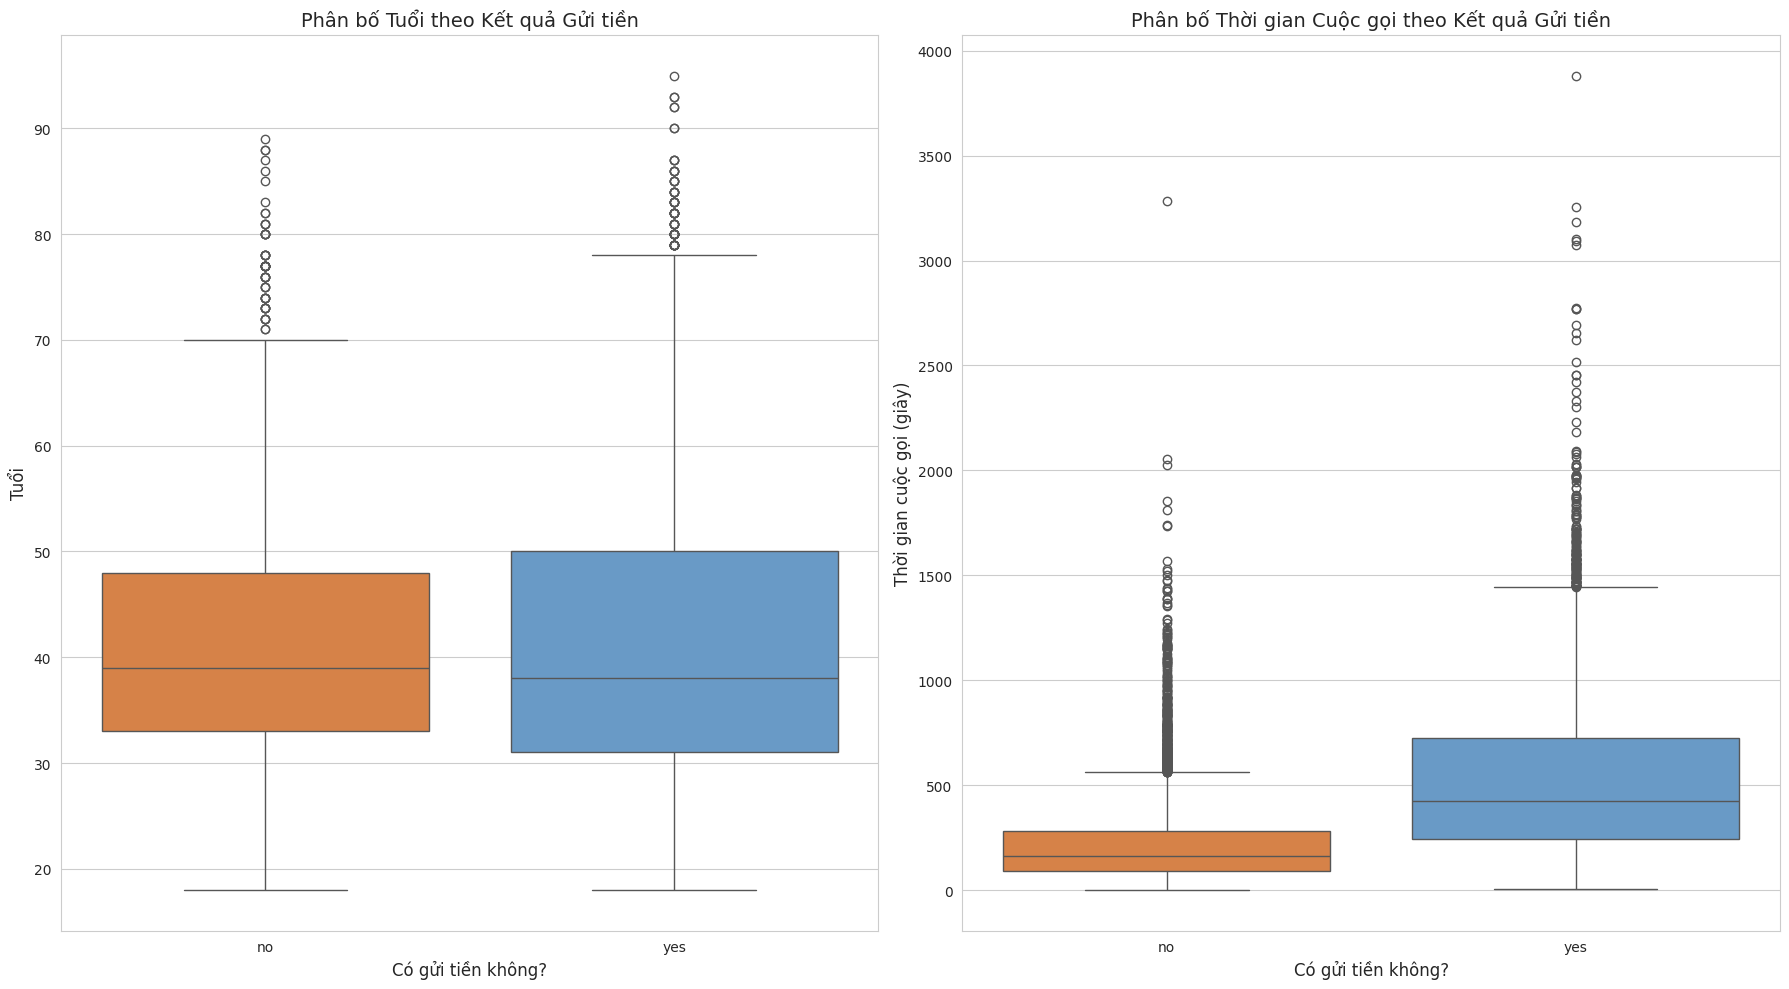

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Biểu đồ hộp cho Tuổi và Gửi tiền
sns.boxplot(x='deposit', y='age', data=df, ax=axes[0], hue = 'deposit', palette=['#5A9BD5', '#ED7D31'], order=['no', 'yes'])
axes[0].set_title('Phân bố Tuổi theo Kết quả Gửi tiền', fontsize=14)
axes[0].set_xlabel('Có gửi tiền không?', fontsize=12)
axes[0].set_ylabel('Tuổi', fontsize=12)

# Biểu đồ hộp cho Thời gian cuộc gọi và Gửi tiền
sns.boxplot(x='deposit', y='duration', data=df, ax=axes[1], hue = 'deposit', palette=['#5A9BD5', '#ED7D31'], order=['no', 'yes'])
axes[1].set_title('Phân bố Thời gian Cuộc gọi theo Kết quả Gửi tiền', fontsize=14)
axes[1].set_xlabel('Có gửi tiền không?', fontsize=12)
axes[1].set_ylabel('Thời gian cuộc gọi (giây)', fontsize=12)

plt.tight_layout()
plt.show()

Biểu đồ hộp được dùng để so sánh phân bố của các biến số liên tục là age và duration giữa hai nhóm quyết định "Gửi tiền" và "Không gửi tiền".

Về Tuổi (age): Phân tích cho thấy không có sự khác biệt đáng kể về độ tuổi trung vị (median) giữa hai nhóm khách hàng. Điều này ngụ ý rằng tuổi tác không phải là một yếu tố mang tính quyết định hay phân biệt rõ ràng trong việc đăng ký sản phẩm tiền gửi của ngân hàng trong tập dữ liệu này.

Về Thời gian cuộc gọi (duration): Trái ngược với tuổi, thời gian cuộc gọi thể hiện một sự khác biệt mang ý nghĩa thống kê sâu sắc. Nhóm khách hàng quyết định gửi tiền có thời gian đàm thoại (cả giá trị trung vị và khoảng phân vị) cao hơn hẳn so với nhóm từ chối.

Kết luận: Thời gian cuộc gọi là một biến dự báo rất quan trọng, có thể phản ánh trực tiếp mức độ quan tâm và sự tương tác tích cực của khách hàng đối với sản phẩm được tư vấn. Trong khi đó, yếu tố tuổi tác lại có ảnh hưởng không đáng kể.

## *13) Biểu đồ so sánh thang đo các biến số*

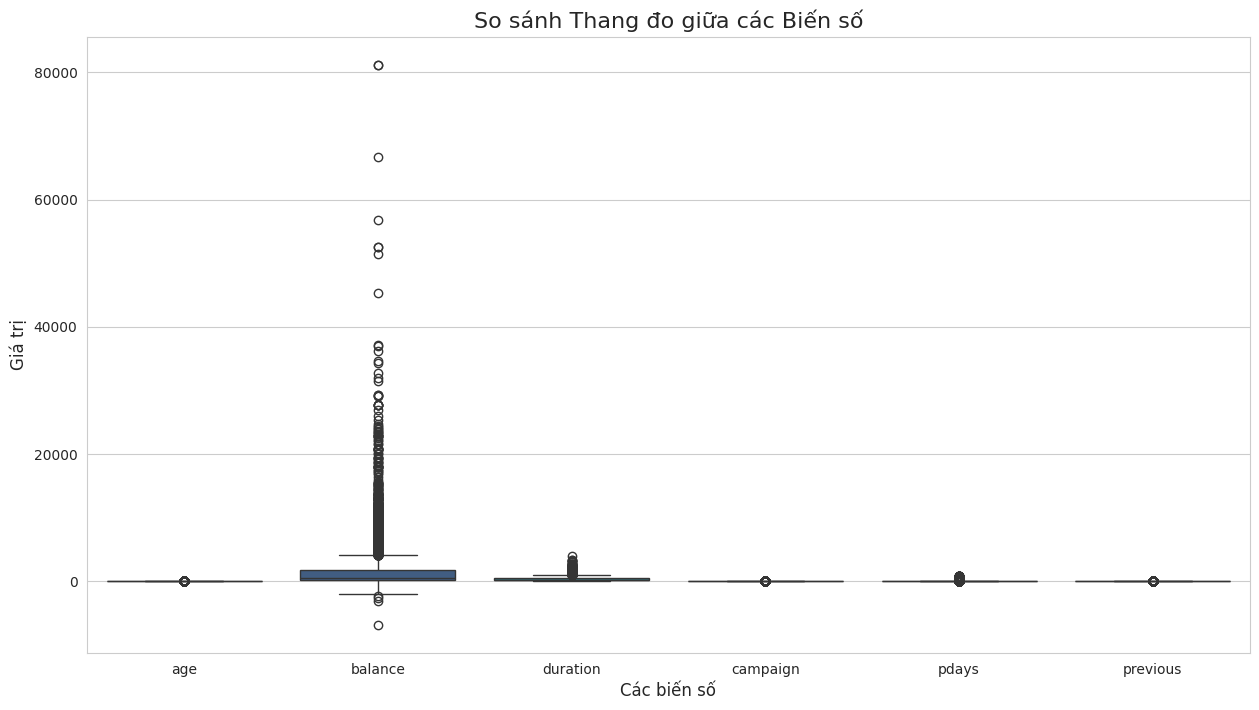

In [27]:
# Chọn các cột dữ liệu dạng số để vẽ biểu đồ
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df_numerical = df[numerical_cols]

# Vẽ biểu đồ
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_numerical, palette='viridis')
plt.title('So sánh Thang đo giữa các Biến số', fontsize=16)
plt.ylabel('Giá trị', fontsize=12)
plt.xlabel('Các biến số', fontsize=12)
plt.show()

Biểu đồ trên mang lại một cái nhìn trực quan và rõ ràng về vấn đề khác biệt thang đo giữa các biến trong tập dữ liệu.

1. Sự thống trị của biến balance
Biến balance (số dư tài khoản) có phạm vi giá trị và độ biến thiên (variance) lớn vượt trội so với các biến còn lại. Thang đo của nó lên tới hàng nghìn, trong khi hầu hết các biến khác chỉ dao động trong khoảng hàng chục hoặc hàng trăm. Điều này khiến cho biểu đồ hộp (box plot) của các biến còn lại gần như bị "nén xuống", rất khó quan sát chi tiết.

2. Sự chênh lệch giữa các biến
Ngay cả khi loại bỏ balance khỏi biểu đồ, chúng ta vẫn thấy sự khác biệt đáng kể về thang đo giữa các biến. Chẳng hạn, duration (thời gian cuộc gọi) thường có giá trị lên tới hàng trăm giây, trong khi age (tuổi) chủ yếu nằm ở mức vài chục, và các biến như campaign hay previous thường chỉ là những con số nhỏ (dưới 10).

3. Vì sao đây là vấn đề nghiêm trọng?
Với những mô hình nhạy cảm với khoảng cách như Mạng nơ-ron nhân tạo (ANN), sự khác biệt về thang đo này có thể gây hiểu nhầm nghiêm trọng. Chẳng hạn, một thay đổi nhỏ trong balance sẽ được mô hình coi là quan trọng hơn nhiều so với một thay đổi lớn trong age hay campaign, chỉ vì giá trị tuyệt đối của nó lớn hơn. Điều này không phản ánh đúng bản chất của dữ liệu và có thể khiến mô hình học sai lệch, dẫn đến kết quả không ổn định và kém chính xác.

KẾT LUẬN: Biểu đồ đã chỉ ra rất rõ rằng Chuẩn hóa dữ liệu (Data Scaling) là một bước bắt buộc trong quá trình tiền xử lý, đặc biệt khi áp dụng các mô hình học sâu như ANN. Đây không phải là một lựa chọn tùy ý, mà là điều kiện tiên quyết để đảm bảo mô hình có thể học một cách công bằng và hiệu quả từ tất cả các đặc trưng đầu vào.


## *14) So ánh tần xuất của các thuộc tính*

<Figure size 1200x1200 with 0 Axes>

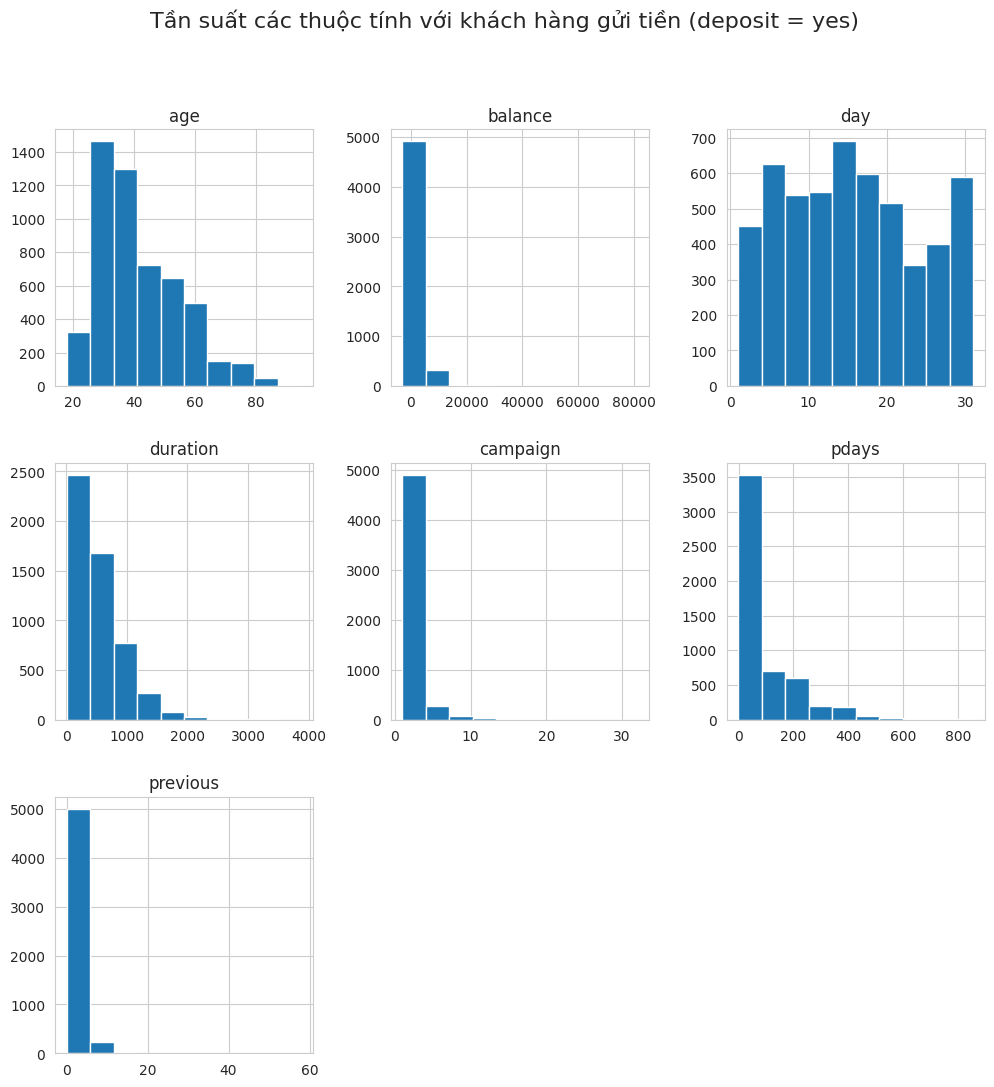

In [22]:
df_yes = df[df['deposit'] == 'yes']
df_no = df[df['deposit'] == 'no']
# Vẽ histogram cho nhóm 'yes'
plt.figure(figsize=(12, 12))
df_yes.hist(figsize=(12, 12))
plt.suptitle("Tần suất các thuộc tính với khách hàng gửi tiền (deposit = yes)", fontsize=16)
plt.show()

<Figure size 1200x1200 with 0 Axes>

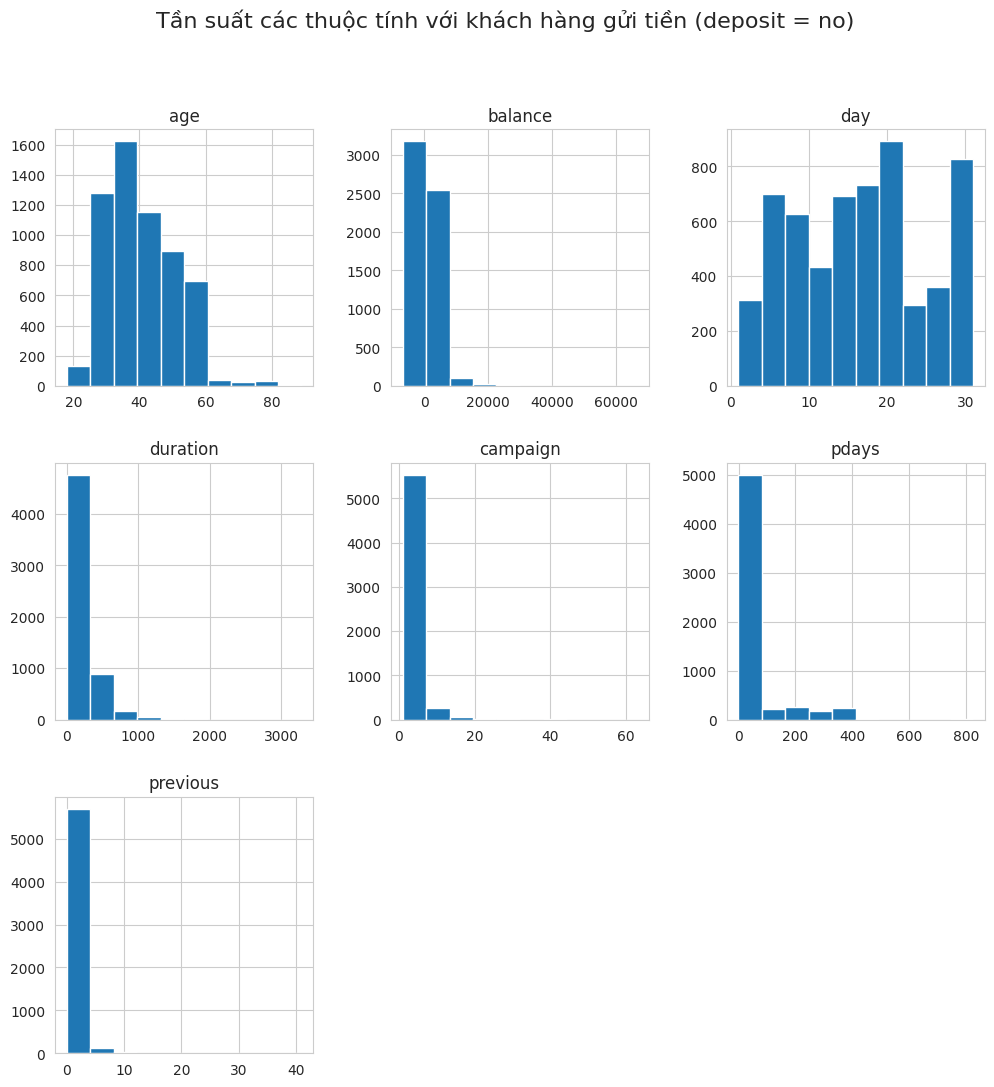

In [23]:
# Vẽ histogram cho nhóm 'yes'
plt.figure(figsize=(12, 12))
df_no.hist(figsize=(12, 12))
plt.suptitle("Tần suất các thuộc tính với khách hàng gửi tiền (deposit = no)", fontsize=16)
plt.show()

####Nhận xét về 2 biểu đồ với deposit(yes/no):
 1. Age (Tuổi)
Cả hai nhóm khách hàng gửi tiền (yes) và không gửi tiền (no) đều tập trung nhiều trong độ tuổi 30–40. Tuy nhiên, nhóm gửi tiền có độ tuổi phân bố rộng hơn, đặc biệt xuất hiện nhiều hơn ở các nhóm tuổi từ 50 trở lên. Điều này cho thấy người lớn tuổi hơn có xu hướng gửi tiền cao hơn, có thể do họ có sự ổn định tài chính và nhu cầu tiết kiệm lớn hơn.
 2. Balance (Số dư tài khoản)
Cả hai nhóm đều có phần lớn khách hàng với số dư thấp. Tuy vậy, ở nhóm gửi tiền, có một số lượng đáng kể khách hàng có số dư cao hơn rất nhiều, lên đến hàng chục nghìn. Điều này cho thấy những khách hàng có số dư tài khoản cao thường có khả năng gửi tiền cao hơn – đây là một chỉ báo tài chính quan trọng cần được đưa vào mô hình dự đoán.
 3. Day (Ngày gọi)
Phân bố ngày gọi trong tháng ở hai nhóm gần như giống nhau và khá đồng đều. Không có sự khác biệt rõ rệt giữa khách hàng gửi và không gửi tiền theo ngày gọi. Vì vậy, thuộc tính này có thể ít tác động đến quyết định gửi tiền, hoặc không phải là yếu tố chính.
 4. Month (Tháng gọi)
Ở nhóm không gửi tiền, số lượng khách hàng tập trung rất nhiều trong tháng 5, cho thấy đây có thể là tháng chiến dịch gọi diễn ra mạnh nhưng không hiệu quả. Ngược lại, nhóm gửi tiền có phân bố đều hơn ở các tháng khác, như tháng 8 và 10. Điều này gợi ý rằng tháng gọi ảnh hưởng đến hiệu quả chiến dịch, và cần cân nhắc lại chiến lược tiếp cận trong từng thời điểm cụ thể.
 5. Duration (Thời lượng cuộc gọi)
Đây là một trong những thuộc tính thể hiện sự khác biệt rõ rệt nhất. Nhóm gửi tiền có nhiều cuộc gọi kéo dài hơn, trong khi nhóm không gửi chủ yếu là những cuộc gọi rất ngắn. Có thể thấy rằng thời lượng cuộc gọi càng dài thì khả năng thuyết phục khách hàng gửi tiền càng cao, do đó đây là yếu tố rất quan trọng để đưa vào mô hình AI.
 6. Campaign (Số lần liên hệ trong chiến dịch)
Khách hàng gửi tiền thường chỉ được liên hệ 1–2 lần, trong khi nhóm không gửi có nhiều người bị gọi nhiều hơn, thậm chí tới hơn 10 lần. Việc liên hệ quá nhiều có thể tạo cảm giác làm phiền, phản tác dụng. Do đó, số lần gọi hợp lý sẽ nâng cao hiệu quả chiến dịch.
 7. Pdays (Số ngày kể từ lần gọi trước)
Nhóm gửi tiền có phân bố rộng hơn ở thuộc tính pdays, nghĩa là họ đã từng được gọi trước đây và khoảng thời gian giữa các lần gọi không quá xa. Trong khi đó, nhóm không gửi chủ yếu có giá trị pdays cao hoặc đặc biệt (999), tức là chưa từng được gọi. Khách hàng đã từng được chăm sóc trước đó có xu hướng gửi tiền cao hơn, nên đây cũng là một chỉ báo tốt.
 8. Previous (Số lần liên hệ trước chiến dịch hiện tại)
Tương tự như pdays, nhóm gửi tiền có xu hướng đã từng được tiếp cận trong quá khứ. Nhóm không gửi tiền phần lớn chưa từng được liên hệ. Điều này tiếp tục khẳng định rằng lịch sử chăm sóc khách hàng là một yếu tố quan trọng giúp nâng cao tỷ lệ gửi tiền.



## *15) Nhận xét bộ dữ liệu gốc*

###I. Điểm Tốt (Có thể giữ lại hoặc sử dụng trực tiếp)

Sự Cân Bằng của Biến Mục Tiêu (deposit):

- Hiện trạng: Tỷ lệ giữa lớp "Gửi tiền" (47.4%) và "Không gửi tiền" (52.6%) gần như là 1:1.
- Đánh giá: Đây là ưu điểm lớn nhất của bộ dữ liệu. Nó cho phép chúng ta xây dựng mô hình mà không cần áp dụng các kỹ thuật xử lý mất cân bằng phức tạp (như SMOTE hay điều chỉnh trọng số lớp). Mô hình sẽ học được đặc điểm của cả hai lớp một cách công bằng, và các chỉ số đánh giá như độ chính xác (accuracy) sẽ trở nên đáng tin cậy hơn.

Tính Hoàn Chỉnh của Dữ liệu (Không có giá trị thiếu):

- Hiện trạng: Bộ dữ liệu không chứa các ô giá trị bị bỏ trống (null/NaN).
- Đánh giá: Điều này giúp chúng ta tiết kiệm được một bước xử lý dữ liệu phức tạp là điền giá trị thiếu (imputation). Dữ liệu sạch và đầy đủ cho phép chúng ta tiến thẳng đến các bước xử lý quan trọng hơn.


###II. Điểm Cần Cải Thiện (Yêu cầu Tiền xử lý)

Sự tồn tại của Dữ liệu dạng Chuỗi (Categorical Data):

- Hiện trạng: Rất nhiều cột quan trọng đang ở định dạng văn bản, không phải dạng số. Ví dụ: job, marital, education, contact, poutcome, month. Các cột nhị phân như default, housing, loan, deposit cũng đang là 'yes'/'no'.
- Vấn đề: Mô hình ANN chỉ có thể xử lý các con số. Nó không hiểu được giá trị "management" hay "married" có ý nghĩa gì.

Giải pháp tiền xử lý:

- Mã hóa One-Hot (One-Hot Encoding): Đối với các cột có nhiều hơn hai loại giá trị (ví dụ: job, education), chúng ta cần chuyển mỗi giá trị thành một cột nhị phân (0/1) riêng biệt.
- Mã hóa Nhị phân (Binary Encoding): Đối với các cột chỉ có hai giá trị 'yes'/'no' (ví dụ: housing, loan, và chính cột deposit), chúng ta sẽ chuyển đổi chúng thành 0 và 1.

Sự khác biệt về Thang đo giữa các Biến số:
- Hiện trạng: Các cột số có đơn vị và khoảng giá trị rất khác nhau. Ví dụ, balance (số dư tài khoản) có thể lên tới hàng chục nghìn, trong khi campaign (số lần liên hệ) thường chỉ là những con số nhỏ.
- Vấn đề: Khi đưa vào mô hình ANN, các thuộc tính có giá trị lớn (như balance) sẽ "lấn át" và có tác động không cân xứng lên quá trình học so với các thuộc tính có giá trị nhỏ, làm cho mô hình hội tụ chậm và kém hiệu quả.

Giải pháp tiền xử lý:
- Chuẩn hóa Dữ liệu (Scaling): Chúng ta cần đưa tất cả các biến số về một thang đo chung. Phương pháp phổ biến là Standardization (Chuẩn hóa Z-score), giúp biến đổi dữ liệu sao cho có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1.

#**TIỀN XỬ LÝ DỮ LIỆU**

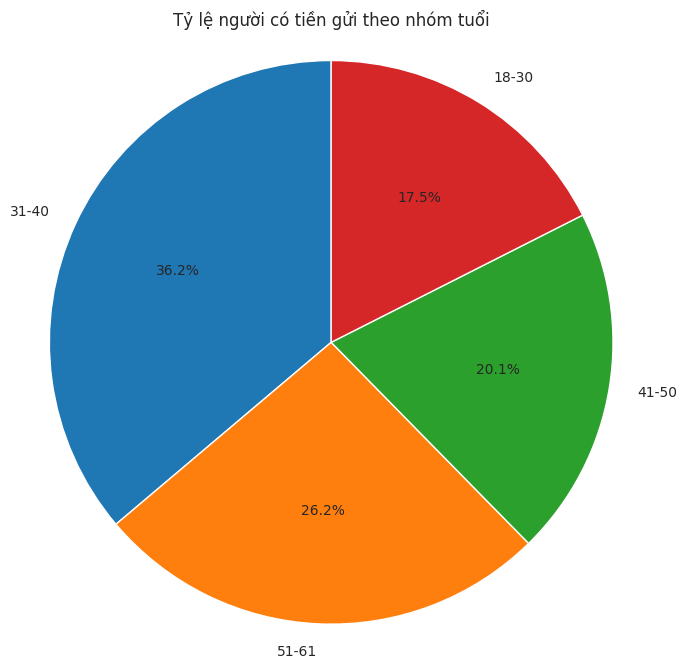

In [32]:
# Đầu tiên, lọc các người có độ tuổi trong các khoảng 18-30, 31-40, 41-50, 51-60, 60-61
# Chia độ tuổi thành các nhóm
bins = [18, 30, 40, 50, 100]
labels = ['18-30', '31-40', '41-50', '51-61']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Lọc dữ liệu cho những người có gửi tiền
deposit_data_age = df[df['deposit'] == 'yes']

# Tính số lượng và tỷ lệ % cho các nhóm độ tuổi
age_group_counts = deposit_data_age['age_group'].value_counts()
age_group_percent = (age_group_counts / age_group_counts.sum()) * 100

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(age_group_percent, labels=age_group_percent.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ người có tiền gửi theo nhóm tuổi')
plt.axis('equal')  # Đảm bảo rằng biểu đồ tròn được vẽ dưới dạng hình tròn với tỷ lệ kích thước trục bằng nhau, tránh việc kích thước trục không bằng nhau sẽ gây móp méo biểu đồ (hình elip)
plt.show()


Vì trong bộ dữ liệu cột age có giá trị trải dài từ 18 - 61 gây khó khăn trong quá trình phân tích nên chúng ta sẽ thực hiện chia độ tuổi thành các nhóm chính (18-30, 31-40, 41-50, 51-61), sau đó lập biểu đồ tròn so sánh tỷ lệ các nhóm độ tuổi này gửi tiền ra sao. Nhìn vào biểu đồ ta thấy:
1. Nhóm tuổi 18-30 chiếm tỷ lệ nhỏ nhất, chỉ khoảng 17.5%. Điều này có thể cho thấy người trẻ tuổi ít có xu hướng gửi tiền vào ngân hàng trong chiến dịch này.
2. Nhóm tuổi 31-40 chiếm tỷ lệ lớn nhất, khoảng 36.2%. Đây có thể là nhóm tuổi có mức thu nhập ổn định hơn, vì vậy họ có xu hướng gửi tiền nhiều hơn.
3. Nhóm tuổi 41-50 chiếm khoảng 20.1%, thể hiện một tỷ lệ khá ổn định, không quá cao cũng không quá thấp.
4. Nhóm tuổi 51-61 chiếm 26.2%, khá cao so với nhóm tuổi 18-30, có thể là do người ở độ tuổi này có nhu cầu tiết kiệm cao hơn cho tương lai.


In [33]:
# Xóa cột 'age'
df = df.drop(columns=['age'])

# Chuyển cột 'age_group' về vị trí đầu tiên
age_group = df.pop('age_group')  # Lấy cột 'age_group'
df.insert(0, 'age_group', age_group)  # Chèn cột 'age_group' vào vị trí đầu tiên

# Kiểm tra lại DataFrame sau khi thay đổi
df.head(10)

,age_group,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,51-61,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,51-61,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41-50,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,51-61,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,51-61,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,41-50,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,51-61,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,51-61,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,31-40,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,18-30,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


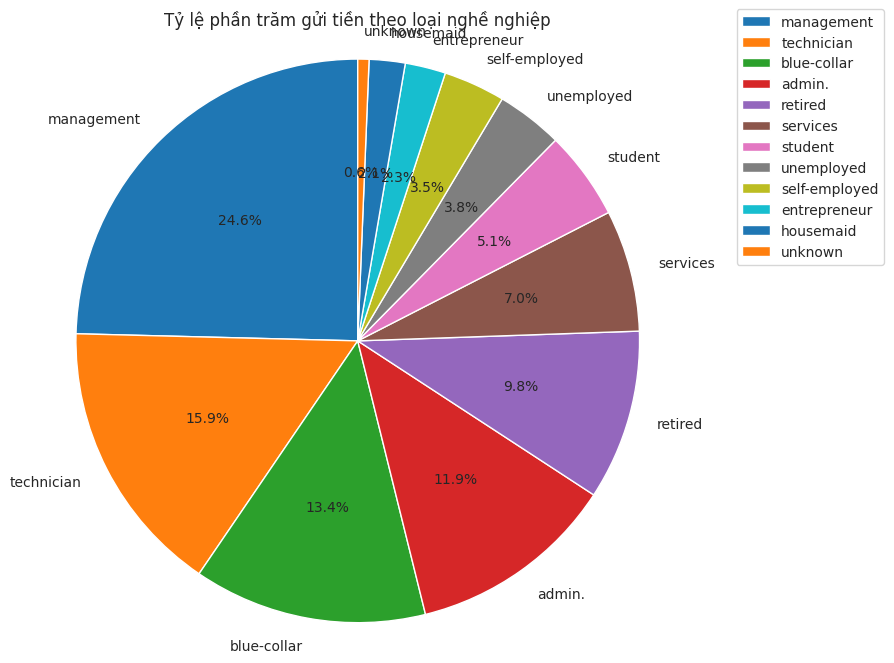

In [34]:
# Lọc dữ liệu để chỉ lấy các hàng có giá trị 'deposit' là 'yes'
deposit_data = df[df['deposit'] == 'yes']

# Đếm số lần xuất hiện của từng loại nghề nghiệp trong số những người đã gửi tiền
job_counts = deposit_data['job'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ phần trăm gửi tiền theo loại nghề nghiệp')
plt.axis('equal')  # Tỷ lệ kích thước trục bằng nhau đảm bảo rằng biểu đồ tròn được vẽ dưới dạng hình tròn
plt.legend(job_counts.index, bbox_to_anchor=(1.1, 1.05), loc='upper left')
plt.show()

Với cột job, ta nhận thấy tỉ lệ có gửi tiền ở các ngành nghề rất khác nhau và có sự chênh lệch lớn giữa nhiều ngành nghề, vậy nên chúng ta cần phải tiến hành phân loại các nhóm ngành nghề, sau đó xét lại tỷ lệ có gửi tiền của các nhóm phân loại mới. Cụ thể:
1. Với các nghề có tỉ lệ gửi tiền cao (xấp xỉ 10% trở lên) như retired, admin, blue-collar, technician, management sẽ giữ nguyên, không phân nhóm mới.
2. Với các nghề còn lại có tỉ lệ gửi tiền thấp, thực hiện phân nhóm mới như sau:
- Nhóm No Income (không có thu nhập): student, unemployed, unknown.
- Nhóm Unstable Income (thu nhập không ổn định): services, housemaid, entrepreneur, self-employed.

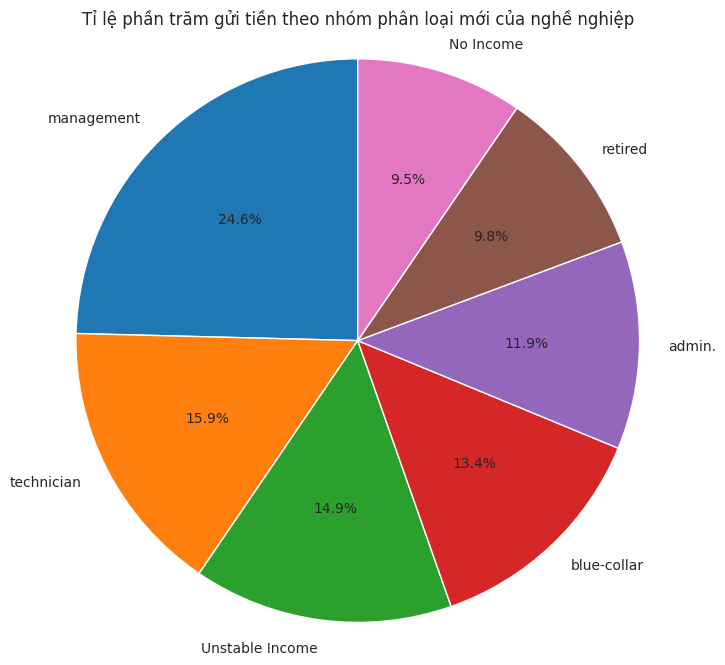

In [35]:
# Thực hiện thay đổi giá trị trong cột 'job'
df['job'] = df['job'].replace({
    'student': 'No Income',
    'unemployed': 'No Income',
    'unknown': 'No Income',
    'services': 'Unstable Income',
    'housemaid': 'Unstable Income',
    'entrepreneur': 'Unstable Income',
    'self-employed': 'Unstable Income'
})

# Lọc dữ liệu để chỉ lấy các hàng có giá trị 'deposit' là 'yes'
deposit_data = df[df['deposit'] == 'yes']

# Đếm số lần xuất hiện của từng loại nghề nghiệp trong số những người đã gửi tiền
job_counts = deposit_data['job'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỉ lệ phần trăm gửi tiền theo nhóm phân loại mới của nghề nghiệp')
plt.axis('equal')
plt.show()

In [36]:
from datetime import datetime
df['month_number'] = df['month'].apply(lambda x: datetime.strptime(x, "%b").month)
df = df.drop(columns=['month'])
df = df.rename(columns={'month_number': 'month'})
# Lấy danh sách các cột hiện tại
columns = list(df.columns)
# Xóa cột 'month' khỏi vị trí cũ
columns.remove('month')
# Xác định vị trí của cột 'day'
day_index = columns.index('day')
# Chèn 'month' vào ngay sau 'day'
columns.insert(day_index + 1, 'month')
# Sắp xếp lại DataFrame theo thứ tự cột mới
df = df[columns]
# Xóa cột 'day'
df = df.drop(columns=['day'])
# Hiển thị Data sau khi thay đổi
print(df.head())

  age_group              job  marital  education default  balance housing  \
0     51-61           admin.  married  secondary      no     2343     yes   
1     51-61           admin.  married  secondary      no       45      no   
2     41-50       technician  married  secondary      no     1270     yes   
3     51-61  Unstable Income  married  secondary      no     2476     yes   
4     51-61           admin.  married   tertiary      no      184      no   

  loan  contact  month  duration  campaign  pdays  previous poutcome deposit  
0   no  unknown      5      1042         1     -1         0  unknown     yes  
1   no  unknown      5      1467         1     -1         0  unknown     yes  
2   no  unknown      5      1389         1     -1         0  unknown     yes  
3   no  unknown      5       579         1     -1         0  unknown     yes  
4   no  unknown      5       673         2     -1         0  unknown     yes  


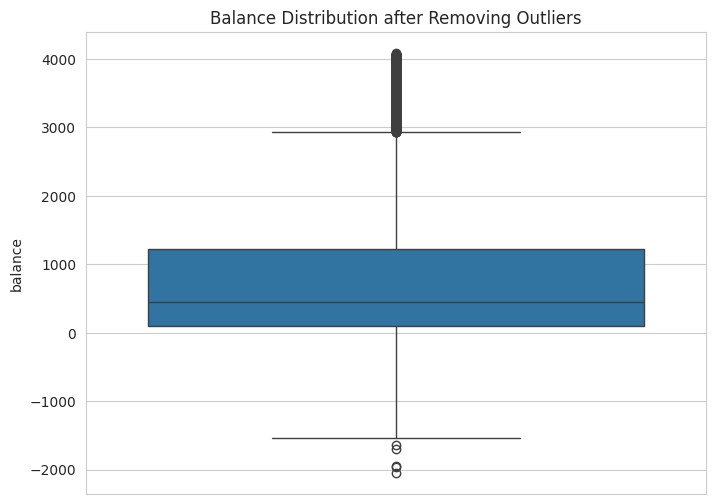

<ipython-input-37-c8200bedd3f8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['balance'] = data_cleaned['balance'].clip(lower=0)


,balance
0,2343
1,45
2,1270
3,2476
4,184


In [37]:
# Xử lý các giá trị ngoại lai (outliers) bằng phương pháp IQR (Interquartile Range)
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Xác định phạm vi hợp lý cho balance (không nằm ngoài 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Loại bỏ các giá trị ngoài phạm vi hợp lý
data_cleaned = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

# Kiểm tra lại phân phối cột balance sau khi loại bỏ outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data_cleaned['balance'])
plt.title('Balance Distribution after Removing Outliers')
plt.show()

# Kiểm tra xem có giá trị âm nào trong cột balance không
data_cleaned['balance'] = data_cleaned['balance'].clip(lower=0)

# Hiển thị một số giá trị đầu tiên sau khi xử lý
data_cleaned[['balance']].head()

Cột balance có giá trị trải dài từ -6847 đến 81204 nên cần đưa về phạm vi nhỏ hơn. Chúng ta sẽ sử dụng IQR để loại bỏ các giá trị ngoại lai sau đó vẽ biểu đồ hộp (boxplot) để kiểm tra. Nhìn vào biểu đồ ta thấy các giá trị nằm tập trung trong khoảng từ 0 đến hơn 1000, vẫn còn xuất hiện các giá trị ngoại lai nhưng đã giảm đáng kể và cũng thu hẹp khoảng giá trị so với ban đầu.

In [38]:
print(df.dtypes)

age_group    category
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
month           int64
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
deposit        object
dtype: object


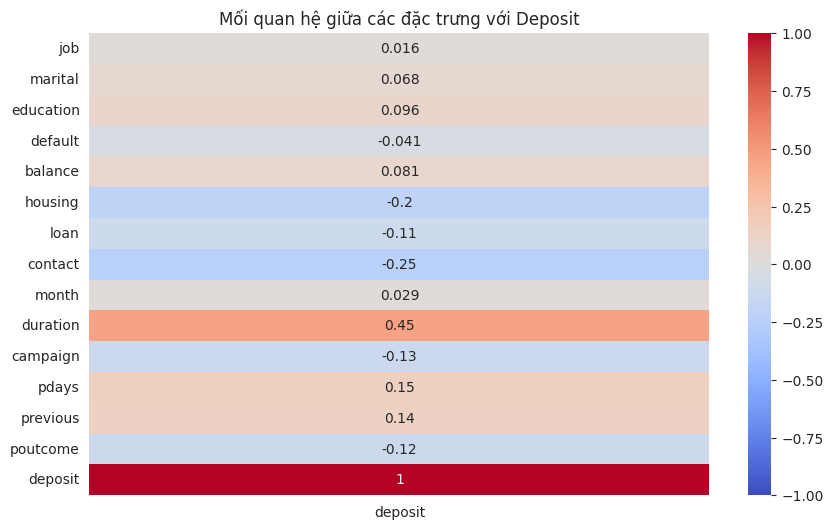

In [39]:
# Chuyển đổi dữ liệu phân loại thành các giá trị số để tính toán mối quan hệ
data_encoded = df.copy().drop(columns=['age_group'])

# Mã hóa các cột phân loại
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
for column in categorical_columns:
    data_encoded[column] = data_encoded[column].astype('category').cat.codes

# Tính toán mối quan hệ giữa mỗi đặc trưng và 'deposit'
correlation_matrix = data_encoded.corr()

# Vẽ biểu đồ nhiệt thể hiện mối quan hệ với 'deposit'
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['deposit']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mối quan hệ giữa các đặc trưng với Deposit')
plt.show()

1. duration (0.45):
Đây là một trong những đặc trưng có mối quan hệ mạnh nhất với deposit. Tỷ lệ khách hàng gửi tiền có xu hướng tăng khi thời gian của cuộc gọi trong chiến dịch marketing càng dài. Điều này có thể giải thích rằng khách hàng càng dành nhiều thời gian để trao đổi với nhân viên tư vấn, họ càng có xu hướng đăng ký gửi tiền, cho thấy rằng thời gian trò chuyện dài có thể tạo sự tin tưởng và thuyết phục khách hàng.
2. balance (0.081):
Mối quan hệ giữa số dư tài khoản và việc gửi tiền là rất yếu. Điều này có thể phản ánh rằng số dư tài khoản không phải là yếu tố quyết định chính đối với việc khách hàng có gửi tiền hay không. Một số khách hàng có thể vẫn chọn gửi tiền mặc dù có số dư không quá cao.
3. job (0.016):
Nghề nghiệp của khách hàng không ảnh hưởng nhiều đến quyết định gửi tiền. Điều này có nghĩa là các yếu tố khác quan trọng hơn, ảnh hưởng nhiều hơn đến khả năng gửi tiền.
4. marital (0.068):
Tình trạng hôn nhân cũng không có ảnh hưởng lớn. Tuy nhiên, có thể có một số tác động phụ thuộc vào các yếu tố khác như thu nhập gia đình.
5. education (0.096):
Mối quan hệ này cho thấy trình độ học vấn cũng không phải là yếu tố quan trọng đối với quyết định gửi tiền.
6. default (-0.041):
Mối quan hệ âm cho thấy khách hàng có nợ xấu có khả năng gửi tiền thấp hơn. Đây là điều dễ hiểu vì khách hàng có nợ xấu có thể gặp khó khăn về tài chính và ít có khả năng tham gia các dịch vụ tài chính như gửi tiền.
7. housing (-0.2):
Mối quan hệ âm này chỉ ra rằng khách hàng đã có vay mua nhà có khả năng gửi tiền thấp hơn. Điều này có thể do họ đã có các khoản chi tiêu lớn như trả góp vay mua nhà, ảnh hưởng đến khả năng tiết kiệm.
8. loan (-0.11):
Mối quan hệ âm cho thấy khách hàng có vay cá nhân có xu hướng ít gửi tiền hơn. Cũng giống như vay mua nhà, các khoản vay cá nhân có thể làm giảm khả năng tiết kiệm của khách hàng.
9. contact (-0.25):
Cách thức liên lạc (cellular, telephone) có thể ảnh hưởng đến khả năng gửi tiền. Có thể những khách hàng được liên lạc qua các phương thức không trực tiếp hoặc không hiệu quả có thể ít tham gia gửi tiền.
10. month (0.029):
Mối quan hệ này gần như không có ảnh hưởng rõ rệt, cho thấy tháng liên hệ không phải là yếu tố quyết định đối với việc khách hàng gửi tiền.
11. pdays (0.15):
Mối quan hệ này cho thấy số ngày kể từ lần liên hệ trước có thể có ảnh hưởng nhỏ đến khả năng gửi tiền. Các khách hàng được liên hệ gần đây có thể dễ dàng tham gia vào chiến dịch gửi tiền hơn.
12. previous (0.14):
Tương tự như pdays, mối quan hệ này cho thấy rằng những khách hàng đã được liên hệ nhiều lần trong các chiến dịch trước đó có khả năng gửi tiền cao hơn.
13. outcome (-0.12):
Kết quả của các chiến dịch trước đó có thể ảnh hưởng tiêu cực đến khả năng gửi tiền của khách hàng.

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import RobustScaler
# Copy lại bộ dữ liệu df

# 1. Xử lý cột 'age_group' bằng Target Encoding (tính tỷ lệ gửi tiền trong từng nhóm tuổi)
# Giả sử cột 'deposit' là mục tiêu và chúng ta sẽ tính tỷ lệ gửi tiền trong mỗi nhóm tuổi
deposit_data_age = df[df['deposit'] == 'yes']

# Tính số lượng và tỷ lệ % cho các nhóm độ tuổi
age_group_counts = deposit_data_age['age_group'].value_counts()
age_group_percent = (age_group_counts / age_group_counts.sum())
df['age_group'] = df['age_group'].map(age_group_percent)


# 3. Xử lý cột 'balance' (sử dụng Log Transformation)
robust_scaler = RobustScaler()

# Áp dụng RobustScaler cho các cột số
df['balance'] = robust_scaler.fit_transform(df[['balance']])

# 4. Chuẩn hóa các cột số khác với MinMaxScaler
numeric_columns = ['duration', 'campaign', 'pdays', 'previous']
min_max_scaler = MinMaxScaler()
df[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

# 5. Đảm bảo cột 'pdays' có giá trị -1 được thay thế thành 0
df['pdays'] = df['pdays'].replace(-1, 0)

# 6. Kiểm tra kết quả
df.head()

,age_group,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.261864,admin.,married,secondary,no,1.130517,yes,no,unknown,5,0.268110,0.000000,0.0,0.0,unknown,yes
1,0.261864,admin.,married,secondary,no,-0.318411,no,no,unknown,5,0.377675,0.000000,0.0,0.0,unknown,yes
2,0.200983,technician,married,secondary,no,0.453972,yes,no,unknown,5,0.357566,0.000000,0.0,0.0,unknown,yes
3,0.261864,Unstable Income,married,secondary,no,1.214376,yes,no,unknown,5,0.148750,0.000000,0.0,0.0,unknown,yes
4,0.261864,admin.,married,tertiary,no,-0.230769,no,no,unknown,5,0.172983,0.016129,0.0,0.0,unknown,yes


In [41]:
# Mã hóa các cột 'default', 'housing', 'loan' thành 0 và 1
binary_columns = ['default', 'housing', 'loan','deposit']
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))


In [42]:
for col in df.select_dtypes(['bool']).columns:
    df[col] = df[col].astype(int)
# Kiểm tra lại dữ liệu sau khi mã hóa
df.head(10)

,age_group,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.261864,admin.,married,secondary,0,1.130517,1,0,unknown,5,0.268110,0.000000,0.0,0.0,unknown,1
1,0.261864,admin.,married,secondary,0,-0.318411,0,0,unknown,5,0.377675,0.000000,0.0,0.0,unknown,1
2,0.200983,technician,married,secondary,0,0.453972,1,0,unknown,5,0.357566,0.000000,0.0,0.0,unknown,1
3,0.261864,Unstable Income,married,secondary,0,1.214376,1,0,unknown,5,0.148750,0.000000,0.0,0.0,unknown,1
4,0.261864,admin.,married,tertiary,0,-0.230769,0,0,unknown,5,0.172983,0.016129,0.0,0.0,unknown,1
5,0.200983,management,single,tertiary,0,-0.346784,1,1,unknown,5,0.144367,0.016129,0.0,0.0,unknown,1
6,0.261864,management,married,tertiary,0,0.176545,1,1,unknown,5,0.309100,0.000000,0.0,0.0,unknown,1
7,0.261864,retired,divorced,secondary,0,-0.003153,1,0,unknown,5,0.265017,0.000000,0.0,0.0,unknown,1
8,0.361694,technician,married,secondary,0,-0.346154,1,0,unknown,5,0.156226,0.000000,0.0,0.0,unknown,1
9,0.175458,Unstable Income,single,secondary,0,2.862547,1,0,unknown,5,0.333849,0.032258,0.0,0.0,unknown,1


In [43]:
# Sử dụng One-Hot Encoding cho các cột phân loại
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'poutcome'])
df.head(10)

,age_group,default,balance,housing,loan,month,duration,campaign,pdays,previous,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.261864,0,1.130517,1,0,5,0.268110,0.000000,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
1,0.261864,0,-0.318411,0,0,5,0.377675,0.000000,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
2,0.200983,0,0.453972,1,0,5,0.357566,0.000000,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
3,0.261864,0,1.214376,1,0,5,0.148750,0.000000,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
4,0.261864,0,-0.230769,0,0,5,0.172983,0.016129,0.0,0.0,...,False,True,False,False,False,True,False,False,False,True
5,0.200983,0,-0.346784,1,1,5,0.144367,0.016129,0.0,0.0,...,False,True,False,False,False,True,False,False,False,True
6,0.261864,0,0.176545,1,1,5,0.309100,0.000000,0.0,0.0,...,False,True,False,False,False,True,False,False,False,True
7,0.261864,0,-0.003153,1,0,5,0.265017,0.000000,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
8,0.361694,0,-0.346154,1,0,5,0.156226,0.000000,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
9,0.175458,0,2.862547,1,0,5,0.333849,0.032258,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True


In [44]:
for col in df.select_dtypes(['bool']).columns:
    df[col] = df[col].astype(int)

In [45]:
for col in df.select_dtypes(include='category').columns:
    df[col] = df[col].astype(float)

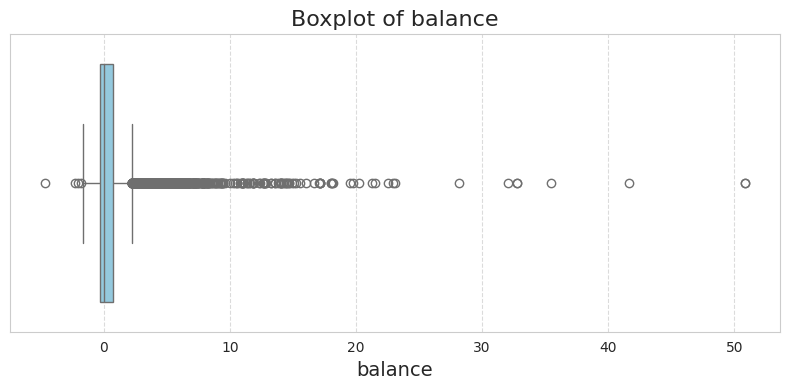

In [46]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['balance'], color='skyblue')
plt.title('Boxplot of balance', fontsize=16)
plt.xlabel('balance', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 1 Cột balance
- Biểu đồ boxplot cho thấy nhiều outliers ở phía trên (các chấm rời rạc bên phải).

- Thân hộp rất hẹp và tập trung quanh giá trị 0 — phản ánh đúng đặc tính của RobustScaler: phần trung tâm dữ liệu được chuẩn hóa ổn định.

- Việc vẫn giữ lại outliers là mong muốn hợp lý, vì balance phản ánh số dư tài khoản, có thể có khách hàng có số dư rất cao.

Kết luận: Cột balance sau chuẩn hóa giữ được phân phối tự nhiên, các outliers được kiểm soát tốt → có thể đưa vào mô hình trực tiếp.

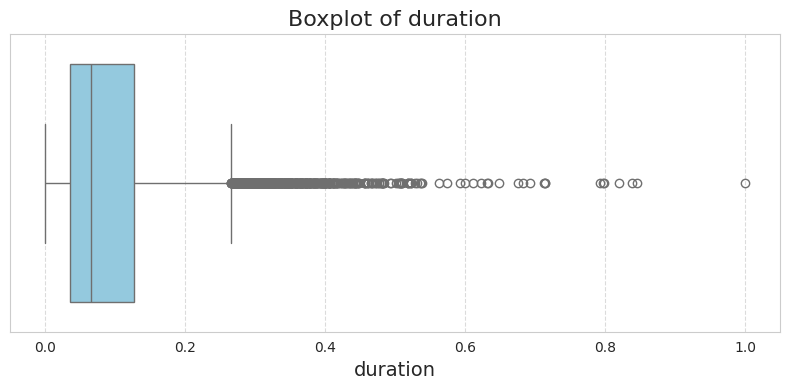

In [47]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration'], color='skyblue')
plt.title('Boxplot of duration', fontsize=16)
plt.xlabel('duration', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2 Cột duration
- Biểu đồ boxplot của duration cho thấy rất ít outliers, phần lớn dữ liệu nằm ở phía dưới.

- Hộp IQR rộng hơn một chút so với các cột khác, phản ánh sự đa dạng về thời lượng cuộc gọi.

- Các giá trị cao hơn (~1.0) tương ứng với những cuộc gọi rất dài — hợp lý về mặt nghiệp vụ.

Kết luận: Phân phối của duration sau chuẩn hóa là hợp lý, phù hợp đưa vào mô hình mà không cần xử lý thêm.

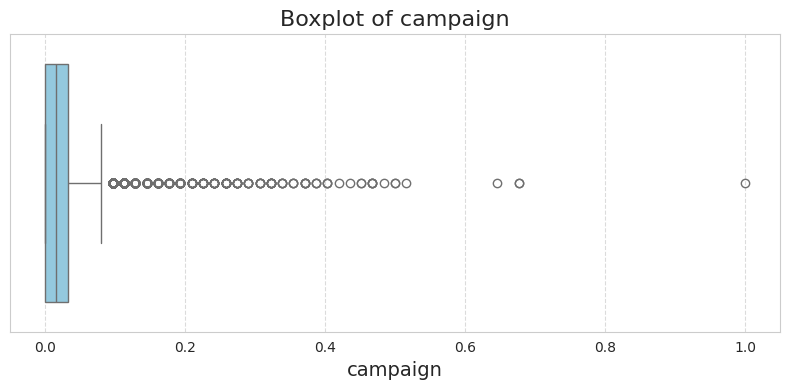

In [48]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['campaign'], color='skyblue')
plt.title('Boxplot of campaign', fontsize=16)
plt.xlabel('campaign', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 3 Cột campaign
- Phần lớn dữ liệu nằm gần giá trị 0 → nhiều khách hàng chỉ được gọi 1 lần.

- Có một số outliers nhỏ phía trên, phản ánh các trường hợp khách hàng được gọi nhiều lần trong chiến dịch.

- Do đã scale về [0,1], outliers không ảnh hưởng nhiều đến quá trình huấn luyện.

Kết luận: Cột campaign có phân phối lệch phải tự nhiên, hợp lý về nghiệp vụ → có thể sử dụng trực tiếp cho mô hình.



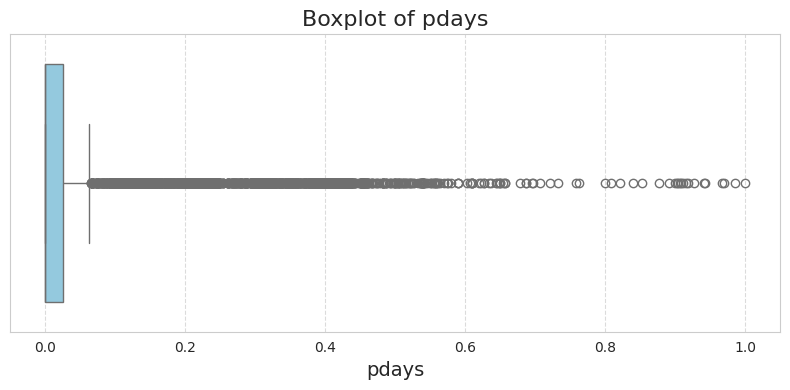

In [49]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['pdays'], color='skyblue')
plt.title('Boxplot of pdays', fontsize=16)
plt.xlabel('pdays', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 4 Cột pdays
- Phần lớn dữ liệu nằm tại giá trị 0 → phản ánh đa số khách hàng chưa được liên hệ trước đó (đặc điểm nghiệp vụ đúng).

- Một số outliers nhỏ nằm phía trên (gần 1.0), tương ứng với các khách hàng từng được liên hệ.

- Đây là cột có tính sparsity cao → nên cẩn trọng khi sử dụng với các mô hình tuyến tính.

Kết luận: Cột pdays thể hiện đúng bản chất nghiệp vụ, tuy sparsity cao nhưng vẫn có giá trị phân biệt tốt, có thể giữ lại khi huấn luyện với XGBoost.

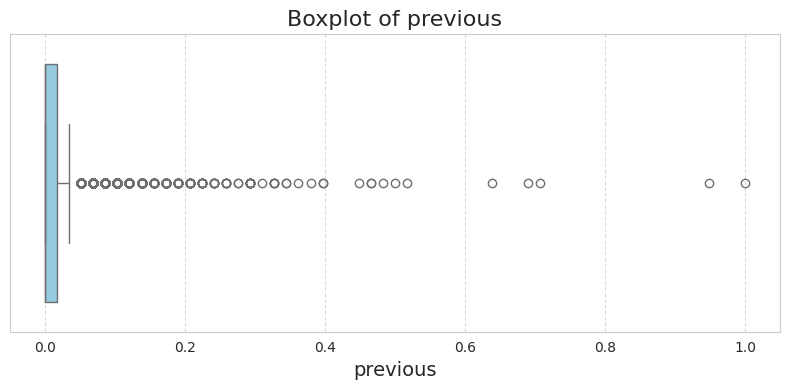

In [50]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['previous'], color='skyblue')
plt.title('Boxplot of previous', fontsize=16)
plt.xlabel('previous', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5 Cột previous
- Giống pdays, phần lớn giá trị nằm tại 0 → khách hàng chưa từng tham gia các chiến dịch trước đó.

- Một số giá trị rời phía trên → phản ánh những khách hàng có lịch sử tham gia.

- Phân phối lệch phải mạnh → đúng bản chất nghiệp vụ.

Kết luận: Cột previous có sparsity cao, nhưng cung cấp thông tin phân biệt cho mô hình → giữ lại trong quá trình huấn luyện, đặc biệt hiệu quả với XGBoost.

- Đối với các biến phân loại (job, marital, education, contact, poutcome), phương pháp xử lý được áp dụng là One-Hot Encoding.
Mục tiêu chính của One-Hot Encoding là chuyển các giá trị phân loại thành các biến nhị phân (0/1), giúp mô hình học được thông tin từ từng nhóm mà không giả định mối quan hệ thứ tự giữa các nhãn.

- Kết quả sau khi One-Hot Encoding cho thấy quá trình này đã diễn ra đúng như mong đợi.

- Cụ thể, mỗi biến phân loại đã được tách thành các cột mới, trong đó mỗi cột đại diện cho một nhóm cụ thể của biến gốc.
Ví dụ:

  - Cột job được tách thành các cột như job_admin., job_blue-collar, job_management, v.v.

  - Cột marital được tách thành marital_divorced, marital_married, marital_single.

- Sau khi mã hóa, các cột mới có giá trị 0 hoặc 1, đảm bảo rằng các biến phân loại không bị chênh lệch về thang đo khi đưa vào mô hình.
Đồng thời, không có biến nào "lấn át" các biến khác do đã loại bỏ yếu tố thứ tự không mong muốn trong dữ liệu phân loại.
- Một điểm quan trọng là quá trình One-Hot Encoding không làm mất đi thông tin phân biệt của các nhóm trong từng biến phân loại.

- Tần suất xuất hiện của các nhóm vẫn được giữ nguyên trong các cột mới.
Ví dụ, nếu trong dữ liệu gốc nhóm marital_married chiếm tỷ trọng cao nhất, thì sau khi mã hóa, cột marital_married cũng có tỷ lệ giá trị 1 cao nhất tương ứng.

- Sự phân bố tự nhiên của các nhóm vẫn được bảo toàn.
Ví dụ, nhóm job_No Income và job_Unstable Income (sau khi bạn chủ động gom nhóm) phản ánh đúng bản chất nghề nghiệp có thu nhập thấp/không ổn định — thông tin này rất có giá trị cho mô hình.

- Không có outliers trong các biến phân loại sau mã hóa, bởi One-Hot Encoding giới hạn các giá trị ở 0 và 1.
Điều này giúp mô hình học được các mối quan hệ thực chất từ dữ liệu phân loại mà không bị ảnh hưởng bởi các giá trị ngoại biên.


